# ML Project

Load libraries, and load train data set to workbook

In [1]:
import pandas as pd
import numpy as np
import re
import pylab 
import scipy.stats as stats
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
pd.set_option("display.max_columns", 100)
print("Number of Rows:", df_train.shape[0])
print("Number of Columns:", df_train.shape[1])
print("-" * 30)

df_train.sample(5)

Number of Rows: 1460
Number of Columns: 81
------------------------------


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1052,1053,60,RL,100.0,9500,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,6,6,1964,1978,Gable,CompShg,VinylSd,VinylSd,BrkCmn,272.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,374,816,GasA,TA,Y,SBrkr,1127,850,0,1977,0,1,1,1,4,1,TA,9,Typ,1,TA,Attchd,1964.0,RFn,2,540,TA,TA,Y,0,52,0,0,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,165000
1025,1026,20,RL,70.0,7700,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,138,Rec,468,276,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1980.0,Unf,2,461,TA,TA,Y,96,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,112500
984,985,90,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1.5Fin,5,5,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1302,432,0,1734,0,0,2,0,4,2,Gd,8,Typ,0,NaN,Attchd,1977.0,Unf,2,539,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Normal,126000
1107,1108,60,RL,168.0,23257,Pave,NaN,IR3,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,868,868,GasA,Ex,Y,SBrkr,887,1134,0,2021,0,0,2,1,3,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,RFn,2,422,TA,TA,Y,0,100,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,274725
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000


### Check for NaN values, columns that have NaN values

`Luana:` Created "Total.Nans" column and changed the name of "total.Nans" column to "Percent.Nans"

In [4]:
def get_Nan(dataframe):
    total_nans=dataframe.isnull().sum().sum()
    print('Total Number of NaNs:')
    print(total_nans)
    print('-'*80)
    
    percent_nans=(total_nans/(dataframe.shape[0]*dataframe.shape[1]))*100
    print('Percentage of NaNs in total data:')
    print("%.2f" %percent_nans)
    print('-'*80)

    print('Number of NaNs per column')
    #Pre-processing steps
    col_nan=pd.DataFrame(dataframe.isnull().sum())
    col_nan=col_nan.reset_index()
    col_nan=col_nan.rename(columns={'index':'column', 0:'Percent.Nans'})
    col_nan['Number.Nans']=col_nan['Percent.Nans']
    #convert to percentage of NaN's per row
    col_nan['Percent.Nans']=(col_nan['Percent.Nans']/len(dataframe))*100
    return (round(col_nan.sort_values(by='Percent.Nans', ascending=False).loc[(col_nan['Percent.Nans'])>0],ndigits=2))        
        

get_Nan(df_train)

Total Number of NaNs:
6965
--------------------------------------------------------------------------------
Percentage of NaNs in total data:
5.89
--------------------------------------------------------------------------------
Number of NaNs per column


,column,Percent.Nans,Number.Nans
72,PoolQC,99.52,1453
74,MiscFeature,96.30,1406
6,Alley,93.77,1369
73,Fence,80.75,1179
57,FireplaceQu,47.26,690
3,LotFrontage,17.74,259
59,GarageYrBlt,5.55,81
64,GarageCond,5.55,81
58,GarageType,5.55,81
60,GarageFinish,5.55,81


### Explore data, compare with previous analysis and see what to do with NaNs in each column

`Luana:` Description of NAs meanings

Meaning of NAs according to the Data Description file:

- Pool Quality (**PoolQC**): No Pool
- Miscellaneous feature not covered in other categories (**MiscFeature**): None
- Type of alley access to property (**Alley**): No alley access
- Fence quality (**Fence**): No Fence
- Fireplace quality (**FireplaceQu**): No Fireplace
- Linear feet of street connected to property (**LotFrontage**): -
- Year garage was built (**GarageYrBlt**): - 
- Garage condition (**GarageCond**): No Garage
- Garage location (**GarageType**): No Garage
- Interior finish of the garage (**GarageFinish**): No Garage
- Garage quality (**GarageQual**): No Garage
- Rating of basement finished area (if multiple types) (**BsmtFinType2**): No Basement
- Refers to walkout or garden level walls (**BsmtExposure**): No Basement
- Evaluates the height of the basement (**BsmtQual**): No Basement
- Evaluates the general condition of the basement (**BsmtCond**): No Basement
- Rating of basement finished area (**BsmtFinType1**): No Basement
- Masonry veneer area in square feet (**MasVnrArea**): -
- Masonry veneer type (**MasVnrType**): -
- Electrical system (**Electrical**): -



Fill Na of PoolQC with 'NoPool' because in description text Na means that there is no pool

In [5]:
df_train['PoolQC']=df_train['PoolQC'].fillna('NoPool')

Check MiscFeature, in description text Na means there are no extra features so Na will be replaced with 'None'

In [6]:
df_train['MiscFeature']=df_train['MiscFeature'].fillna('None')

Check Alley column, in description text Na means there is no alley access, Na will be replaced with 'NoAccess'

In [7]:
df_train['Alley']=df_train['Alley'].fillna('NoAccess')

Check Fence column, in description text Na means no fence, Na will be replaced with 'NoFence'

In [8]:
df_train['Fence']=df_train['Fence'].fillna('NoFence')

Check Fireplace column, in description text Na means no fireplace, Na will be replaced with 'NoFireplace'

In [9]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna('NoFireplace')

Check GarageCond, in description text Na means no garage, Na will be replaced with "NoGarage"

In [10]:
df_train['GarageCond']=df_train['GarageCond'].fillna('NoGarage')

Check GarageType, in description text Na means no garage, Na will be replaced with "NoGarage"

In [11]:
df_train['GarageType']=df_train['GarageType'].fillna('NoGarage')

Check GarageFinish, in description text Na means no garage, Na will be replaced with "NoGarage"

In [12]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna('NoGarage')

Check GarageQual, in description text Na means no garage, Na will be replaced with "NoGarage"

In [13]:
df_train['GarageQual']=df_train['GarageQual'].fillna('NoGarage')

Check BsmtExposure, in description text Na means no basement, Na will be replaced with "NoBasement"

In [14]:
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna('NoBasement')

Check BsmtFinType2, in description text Na means no basement, Na will be replaced with "NoBasement"

In [15]:
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna('NoBasement')

Check BsmtFinType1, in description text Na means no basement, Na will be replaced with "NoBasement"

In [16]:
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna('NoBasement')

Check BsmtCond, in description text Na means no basement, Na will be replaced with "NoBasement"

In [17]:
df_train['BsmtCond']=df_train['BsmtCond'].fillna('NoBasement')

Check BsmtQual, in description text Na means no basement, Na will be replaced with "NoBasement"

In [18]:
df_train['BsmtQual']=df_train['BsmtQual'].fillna('NoBasement')

`Luana:` NA description for all garage columns except 'Year Built'. Fillna(0) -> plots

Checking the empty values for the garage year built, the empty values match with the rows that have Na's in the other columns. Therefore we can replace those values with 'NoGarage'

In [19]:
print("Unique Garage Types for GarageYrBlt = NA:", df_train[df_train["GarageYrBlt"].isna()]["GarageType"].unique())

Unique Garage Types for GarageYrBlt = NA: ['NoGarage']


In [20]:
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(1950)

To work with different type of analysis:
 - LotFrontage
 - MasVnrArea
 - MasVnrType
 - Electrical

In [21]:
get_Nan(df_train)

Total Number of NaNs:
276
--------------------------------------------------------------------------------
Percentage of NaNs in total data:
0.23
--------------------------------------------------------------------------------
Number of NaNs per column


,column,Percent.Nans,Number.Nans
3,LotFrontage,17.74,259
25,MasVnrType,0.55,8
26,MasVnrArea,0.55,8
42,Electrical,0.07,1


`Luana`: deleted all rows with NA values (**temporary!**)

In [22]:
df_train["LotFrontage"]=df_train["LotFrontage"].fillna(0)

In [23]:
#df_train = df_train[pd.notnull(df_train["LotFrontage"])]
df_train = df_train[pd.notnull(df_train["MasVnrType"])]
df_train = df_train[pd.notnull(df_train["MasVnrArea"])]
df_train = df_train[pd.notnull(df_train["Electrical"])]
                #we have only one missing observation in electrical, we can  probably just delete this row
get_Nan(df_train)

Total Number of NaNs:
0
--------------------------------------------------------------------------------
Percentage of NaNs in total data:
0.00
--------------------------------------------------------------------------------
Number of NaNs per column


,column,Percent.Nans,Number.Nans


In [24]:
corr = df_train.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011119,-0.024121,-0.032789,-0.032075,0.013595,-0.016378,-0.025398,-0.049736,-0.006218,-0.005213,-0.007841,-0.016309,0.009820,0.006626,-0.044033,0.008606,0.001900,-0.019569,0.004834,0.004350,0.041371,0.005034,0.028894,-0.016544,0.000071,0.014676,0.015772,-0.028217,-0.005435,0.004939,-0.046455,0.002058,0.057388,-0.006025,0.019499,0.002630,-0.025188
MSSubClass,0.011119,1.000000,-0.214937,-0.138039,0.034799,-0.061147,0.027979,0.040664,0.023156,-0.069241,-0.066037,-0.138789,-0.236547,-0.249775,0.307931,0.046463,0.077025,0.004115,-0.002542,0.136051,0.175813,-0.021715,0.286684,0.042300,-0.044127,0.055428,-0.039167,-0.098027,-0.012652,-0.005200,-0.010437,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.021583,-0.082760
LotFrontage,-0.024121,-0.214937,1.000000,0.102913,0.174317,-0.055981,0.035166,0.077282,0.105449,0.079052,-0.009355,0.159695,0.240007,0.248621,0.044248,0.050147,0.223427,0.012925,-0.027962,0.122753,-0.013435,0.148698,0.039984,0.224644,0.049420,0.045018,0.164679,0.200560,-0.016202,0.065885,0.031289,0.023575,0.023042,0.114487,-0.059809,0.015888,-0.010294,0.208453
LotArea,-0.032789,-0.138039,0.102913,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,0.111674,-0.004250,0.258538,0.295977,0.052979,0.004897,0.261152,0.157695,0.048365,0.122526,0.016364,0.117788,-0.024708,0.188012,0.269677,-0.003715,0.154761,0.180767,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,0.003177,-0.012969,0.264668
OverallQual,-0.032075,0.034799,0.174317,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,-0.058211,0.309461,0.536836,0.476645,0.299021,-0.030071,0.594431,0.108108,-0.039348,0.552939,0.272338,0.106013,-0.184799,0.430817,0.400090,0.568408,0.600055,0.560502,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,0.068514,-0.025116,0.790085
OverallCond,0.013595,-0.061147,-0.055981,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.042292,0.039234,-0.137104,-0.167932,-0.139260,0.027720,0.025099,-0.076631,-0.051877,0.117217,-0.190170,-0.061030,0.014334,-0.081338,-0.055864,-0.020470,-0.292301,-0.184777,-0.151204,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,-0.004210,0.043487,-0.076361
YearBuilt,-0.016378,0.027979,0.035166,0.015708,0.572129,-0.376557,1.000000,0.590324,0.316345,0.250209,-0.047609,0.150218,0.394285,0.285655,0.009036,-0.183738,0.199621,0.187085,-0.036897,0.469310,0.239672,-0.068781,-0.173867,0.097251,0.151023,0.812571,0.537508,0.478948,0.226960,0.185758,-0.386748,0.032145,-0.048977,0.005368,-0.033994,0.009756,-0.014559,0.523274
YearRemodAdd,-0.025398,0.040664,0.077282,0.015190,0.550499,0.075545,0.590324,1.000000,0.180136,0.128422,-0.066485,0.182219,0.292985,0.243464,0.139804,-0.061980,0.288569,0.118850,-0.011137,0.440011,0.180316,-0.038566,-0.148432,0.193851,0.115594,0.624055,0.419764,0.371088,0.207514,0.224140,-0.192185,0.046012,-0.037471,0.006198,-0.009866,0.018959,0.035263,0.507488
MasVnrArea,-0.049736,0.023156,0.105449,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,-0.072443,0.114298,0.363667,0.344255,0.174874,-0.069127,0.390818,0.085017,0.026581,0.277238,0.202058,0.102898,-0.037698,0.280839,0.248800,0.273798,0.364381,0.372990,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,-0.008147,0.477486
BsmtFinSF1,-0.006218,-0.069241,0.079052,0.213081,0.236421,-0.042292,0.250209,0.128422,0.264469,1.000000,-0.049498,-0.496605,0.520098,0.442838,-0.135330,-0.064447,0.205944,0.647159,0.068473,0.056371,0.002778,-0.105617,-0.086643,0.044288,0.257828,0.173050,0.222531,0.295374,0.205447,0.107279,-0.105887,0.02

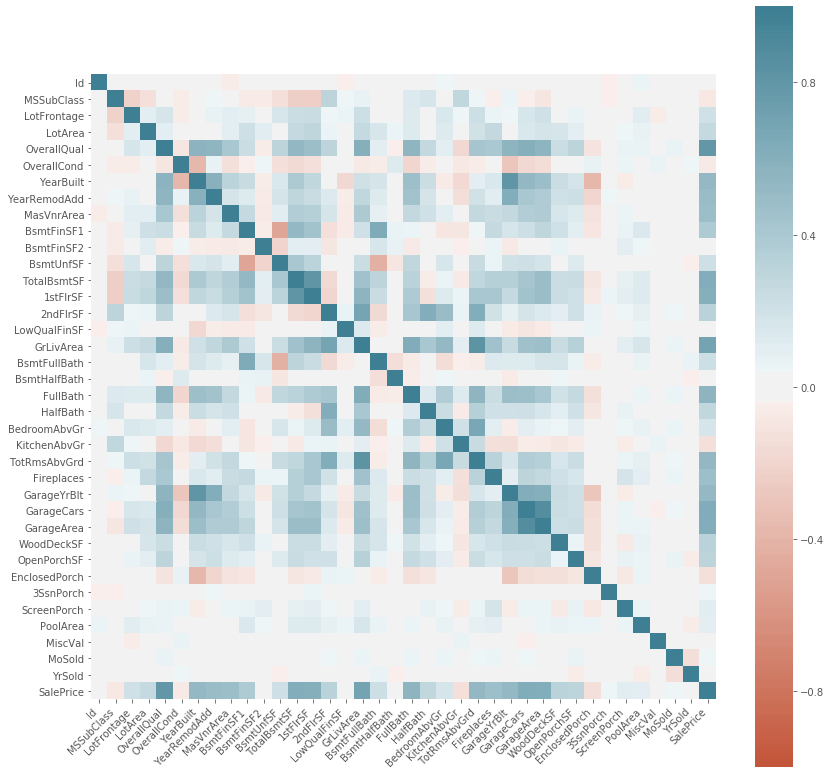

In [25]:
plt.figure(figsize = (14,14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [26]:
#sns.set(style="ticks", color_codes=True)
##cols = ['SalePrice', 'OverallQual', 'GrLivArea', "Neighborhood"]
#sns.pairplot(df_train, height = 3.0)
#plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.2, axis = "y")
#plt.show()

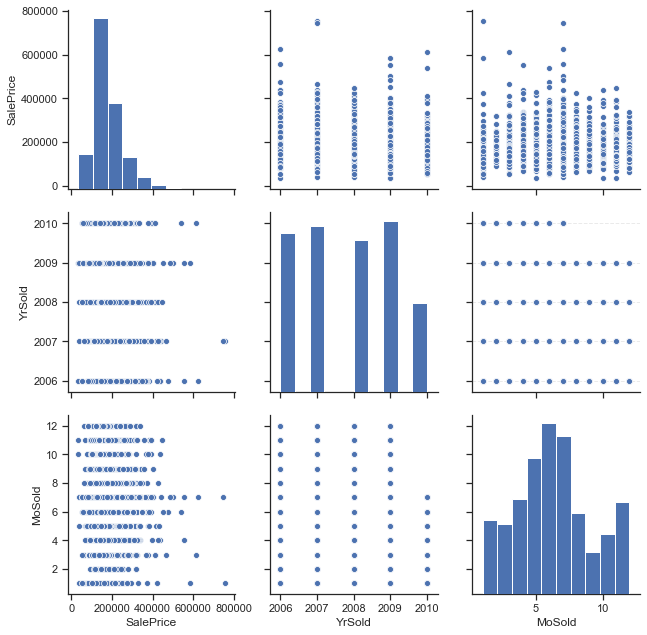

In [27]:
sns.set(style="ticks", color_codes=True)
cols = ['SalePrice', 'YrSold', 'MoSold']
sns.pairplot(df_train[cols], height = 3.0)
plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.2, axis = "y")
plt.show()

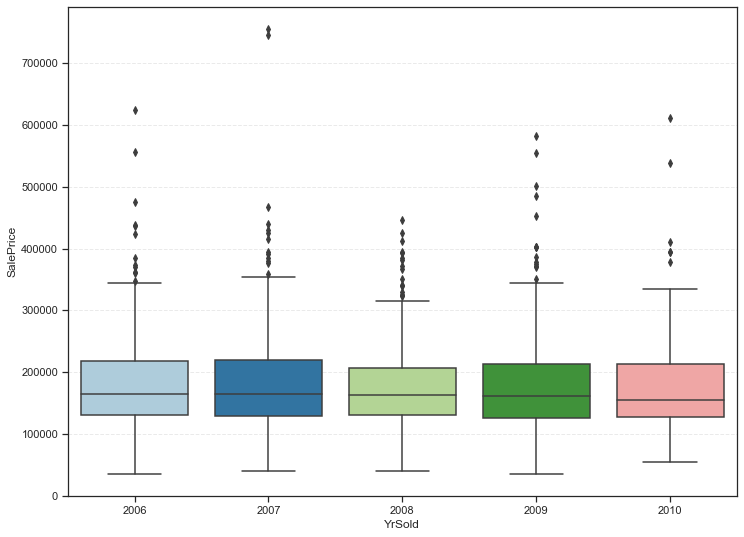

In [28]:
plt.figure(figsize = (12,9))
sns.set(style="ticks", color_codes=True)
sns.boxplot(df_train["YrSold"], df_train["SalePrice"], palette = "Paired")
plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.2, axis = "y")
plt.show()

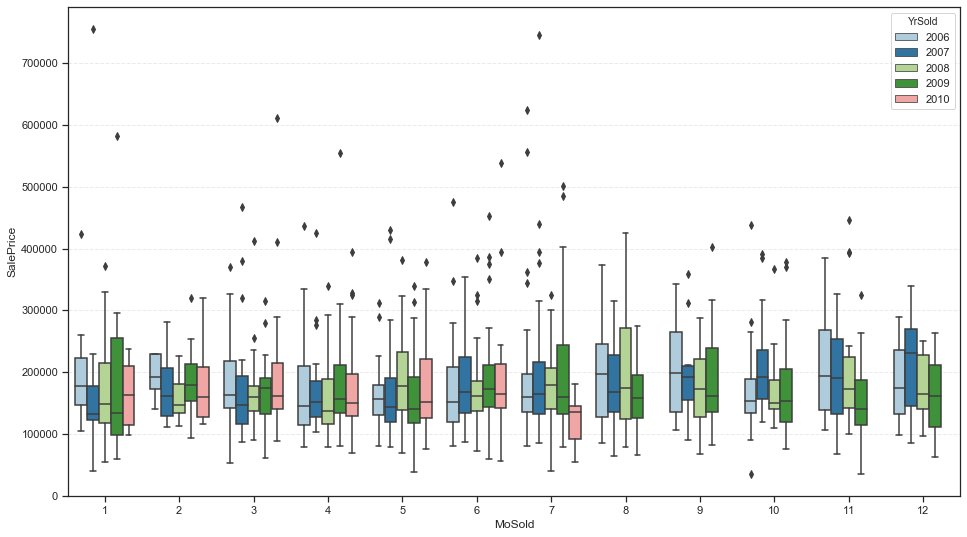

In [29]:
plt.figure(figsize = (16,9))
sns.set(style="ticks", color_codes=True)
sns.boxplot(df_train["MoSold"], df_train["SalePrice"], hue = df_train["YrSold"], palette = "Paired")
plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.2, axis = "y")
plt.show()

# Boxplots (categorical variables)

In [30]:
def boxplot (features):
    
    for elem in features:

        my_order = df_train.groupby(by=[elem])["SalePrice"].median().sort_values(ascending=False).iloc[::-1].index

        nobs = df_train[elem].value_counts().reindex(my_order).values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]
                
        plt.figure(figsize = (14,7))
        sns.set(style="ticks", color_codes=True)
        ax = sns.boxplot(df_train[elem], df_train["SalePrice"],
                         color = [0.7622812227381776, 0.8406850963511671, 0.6846482959871109], showmeans = True,
                         meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"darkgreen"},
                         order = my_order)
        plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.2, axis = "y")
        
        pos = range(len(nobs))
        for tick,label in zip(pos,ax.get_xticklabels()):
            ax.text(pos[tick], 5000, nobs[tick],
            horizontalalignment='center', size='x-small', color='dimgrey', weight='semibold')

        
        plt.show()

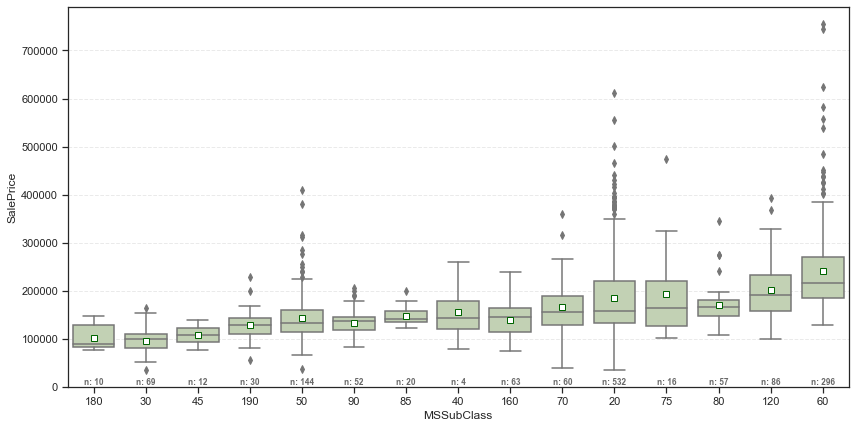

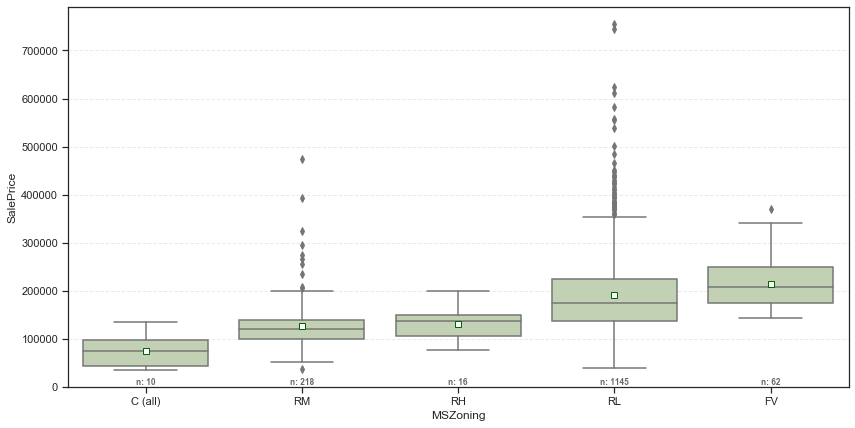

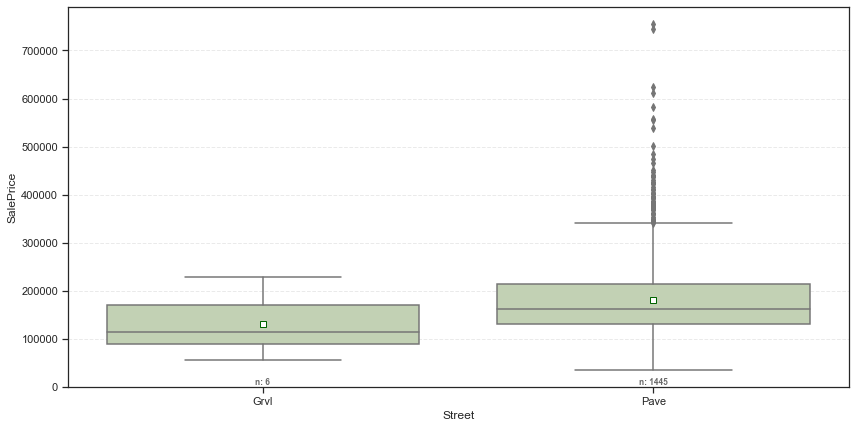

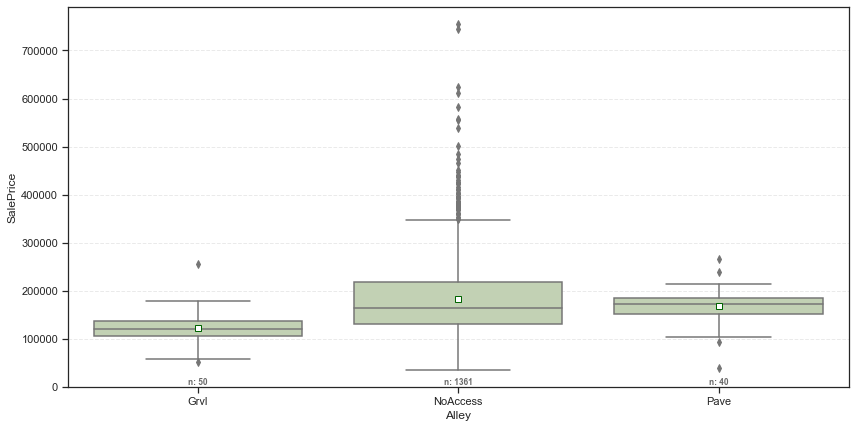

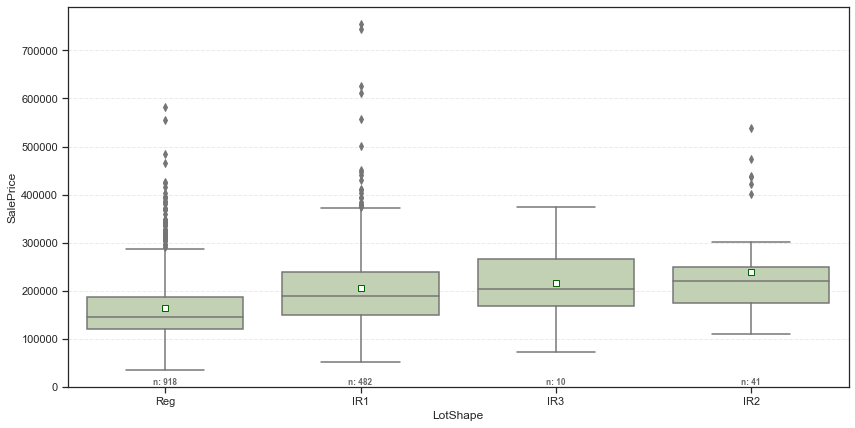

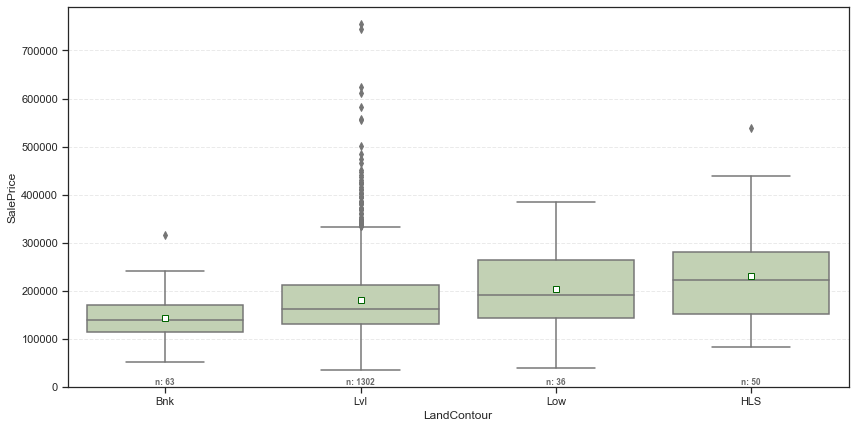

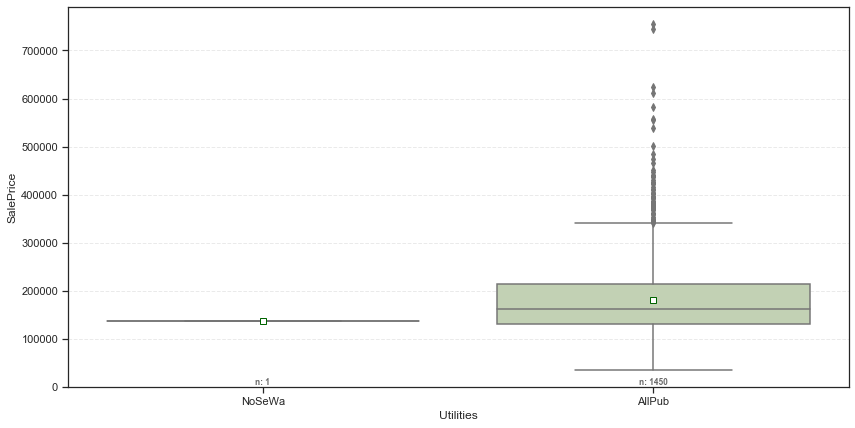

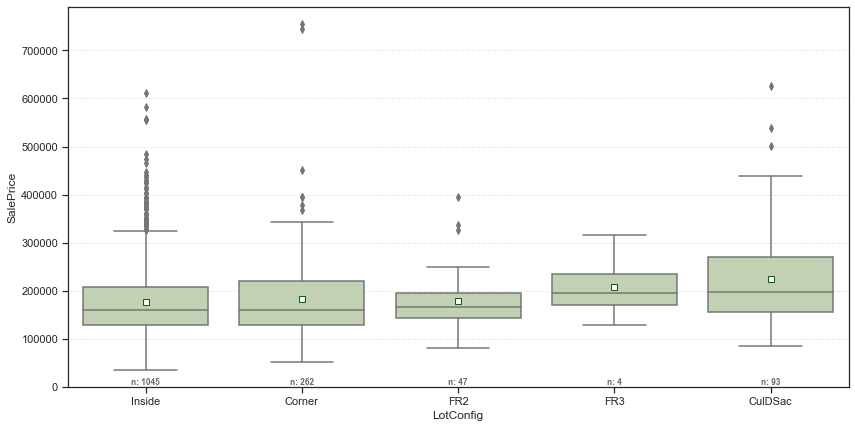

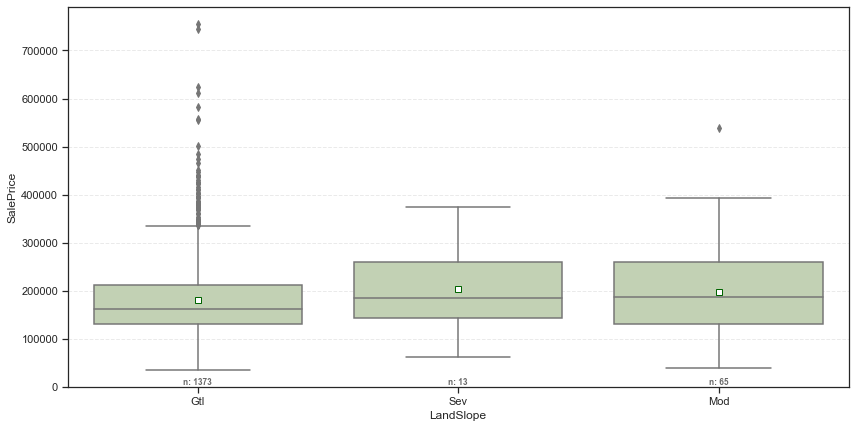

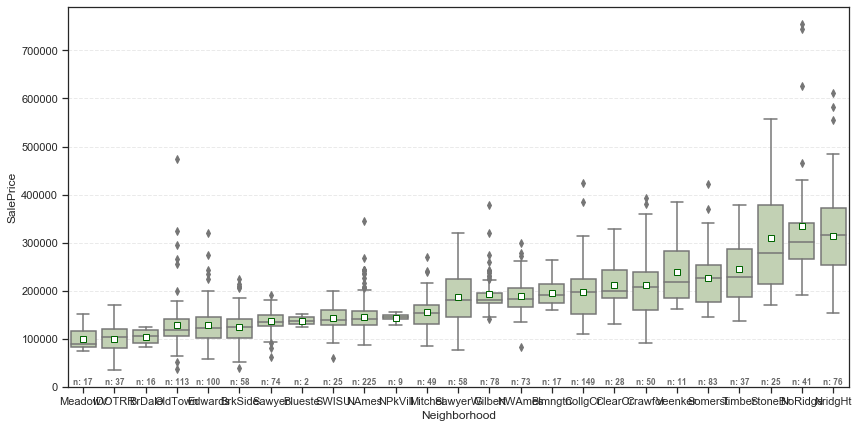

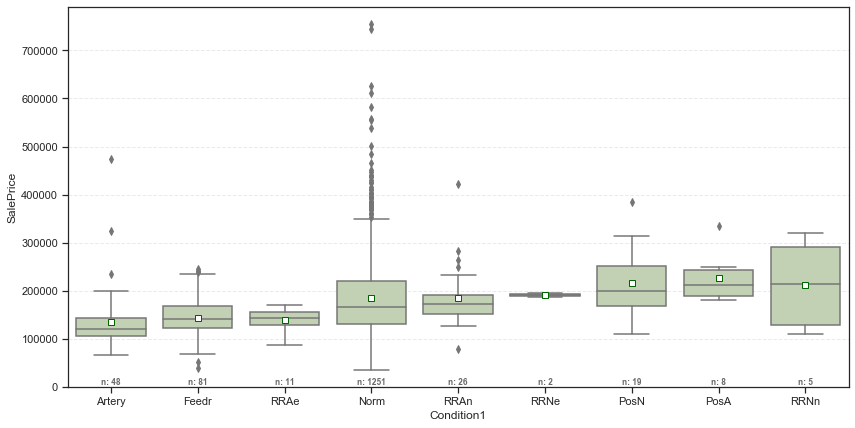

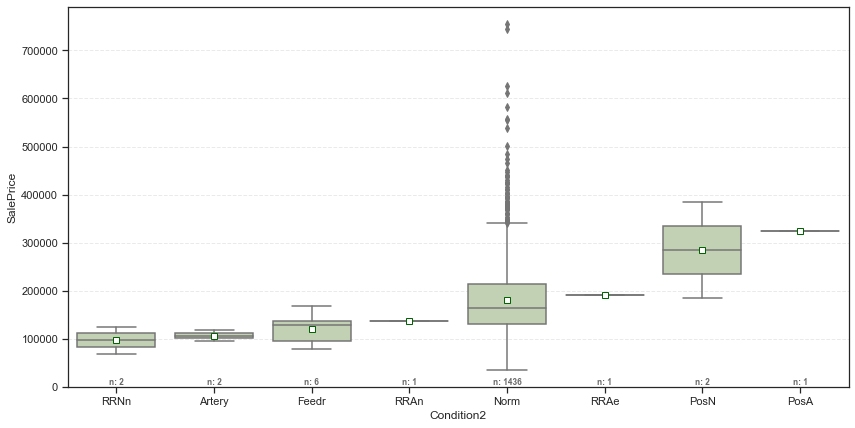

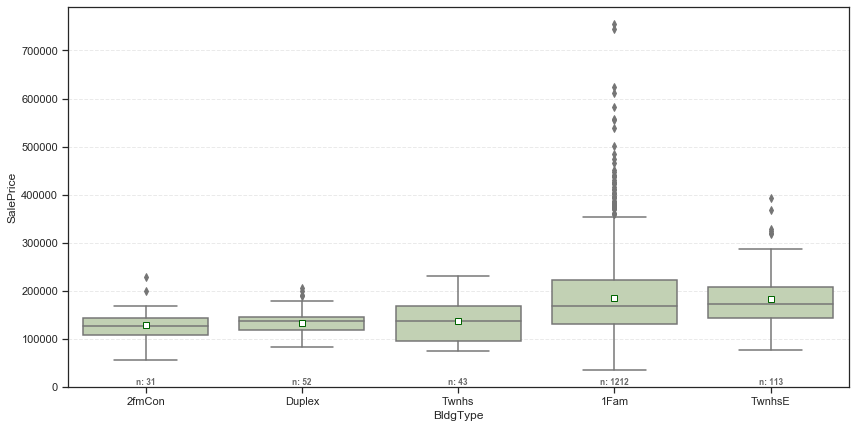

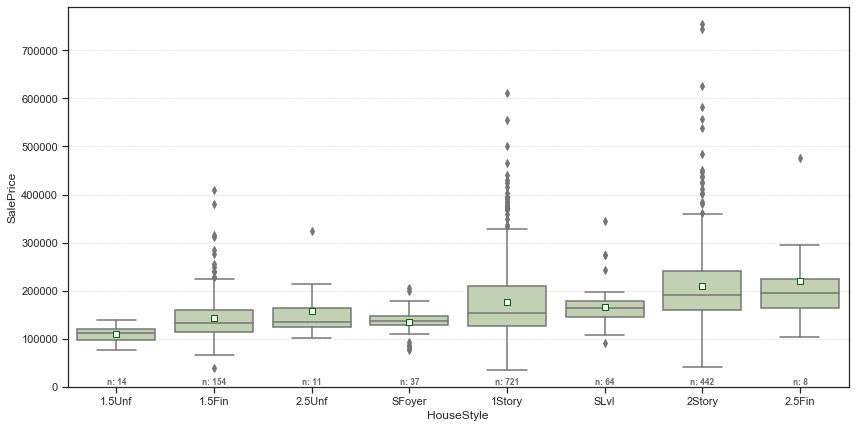

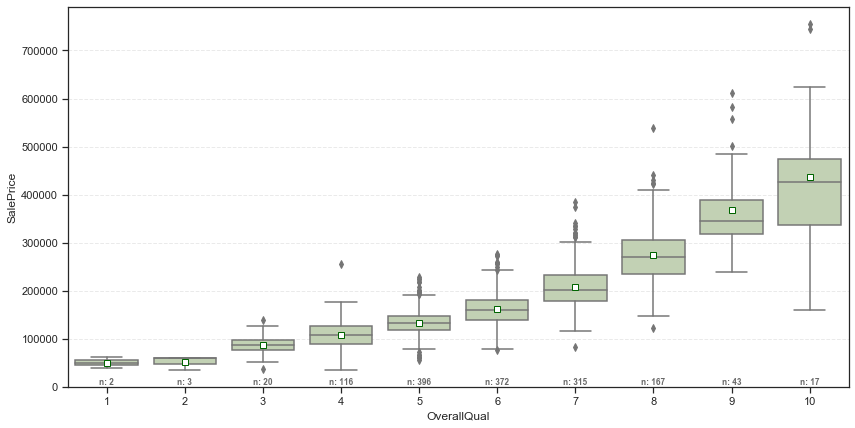

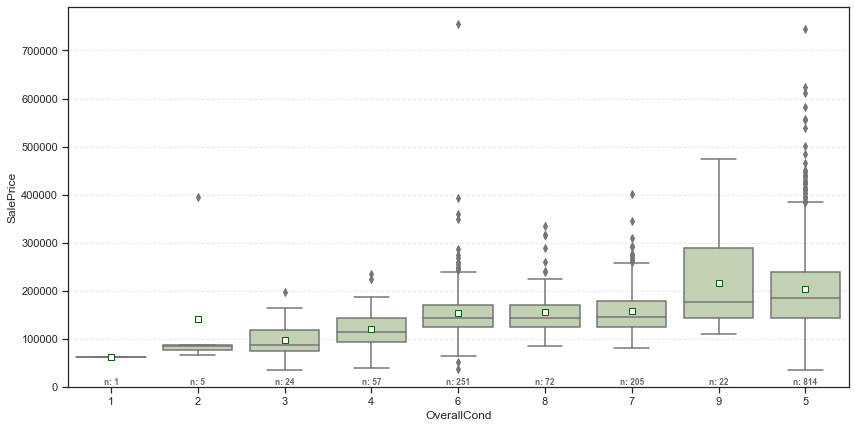

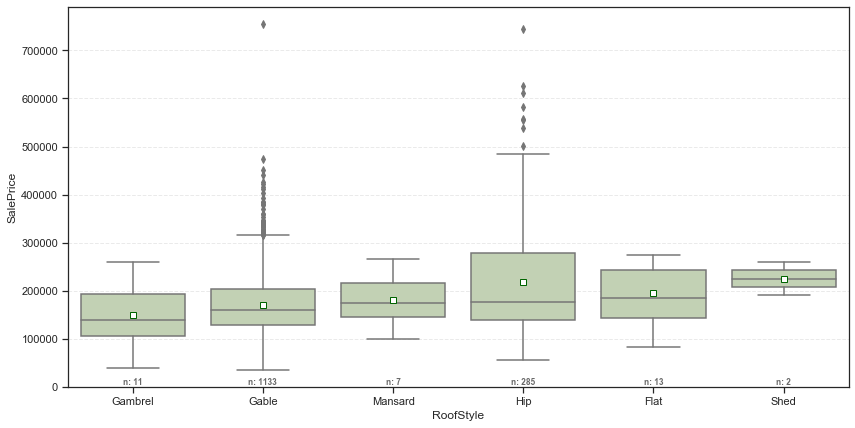

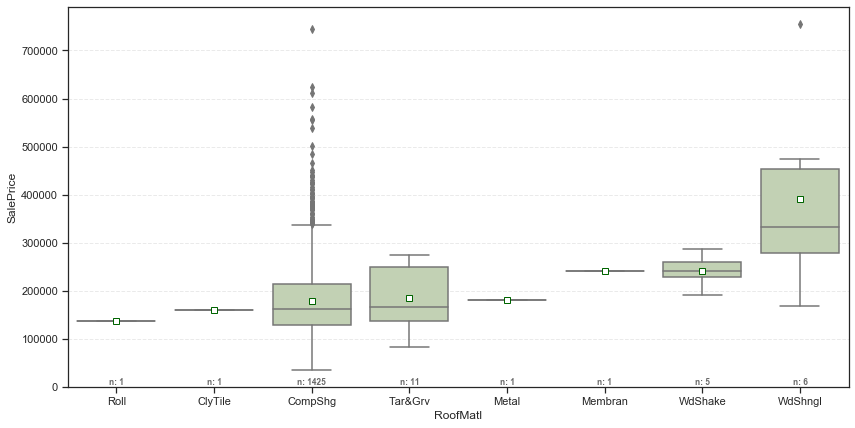

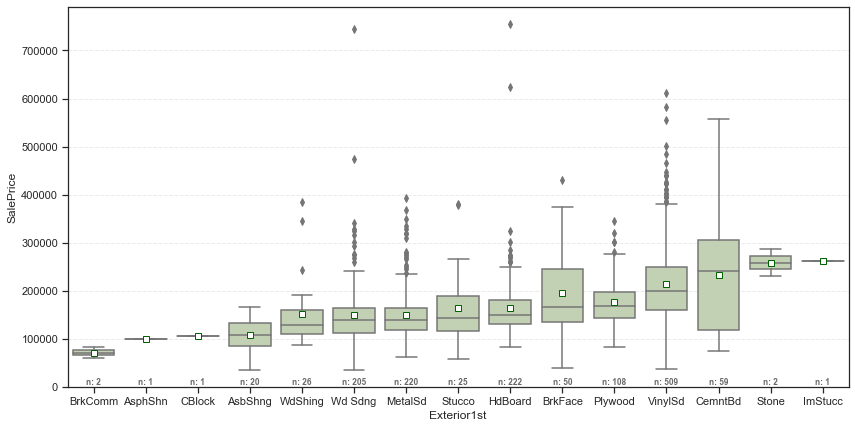

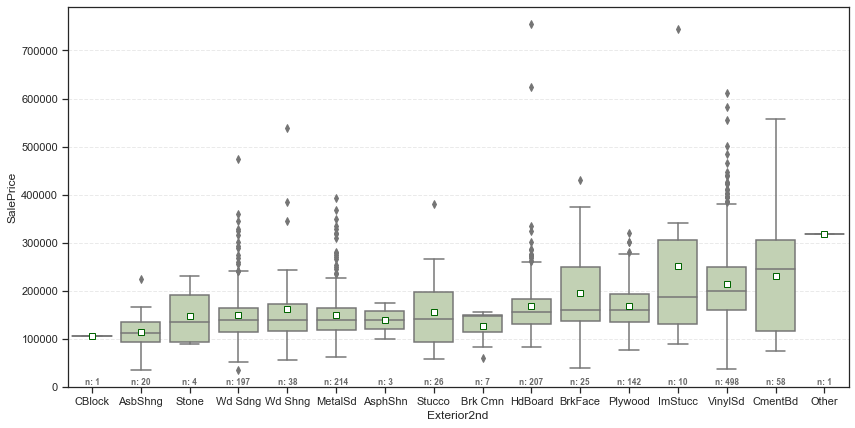

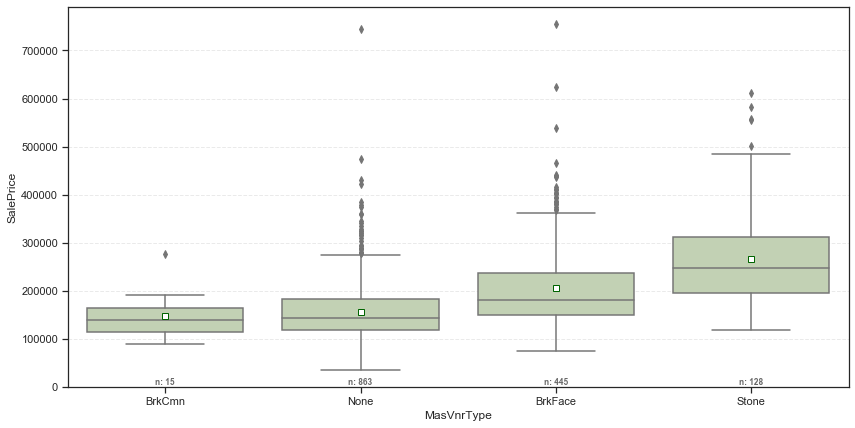

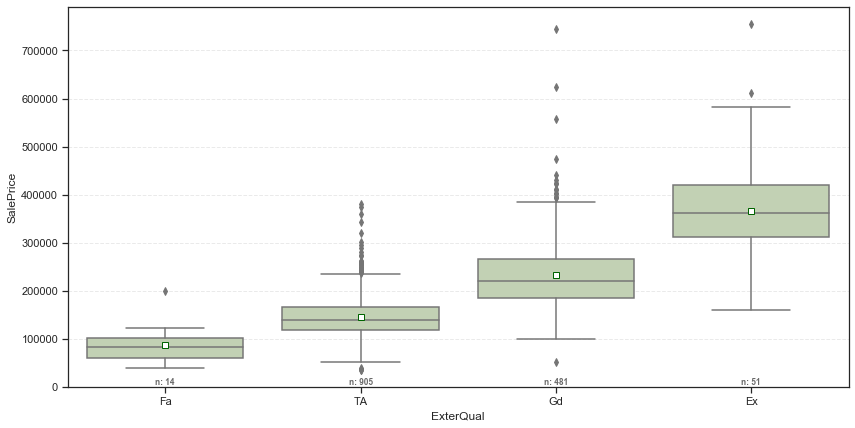

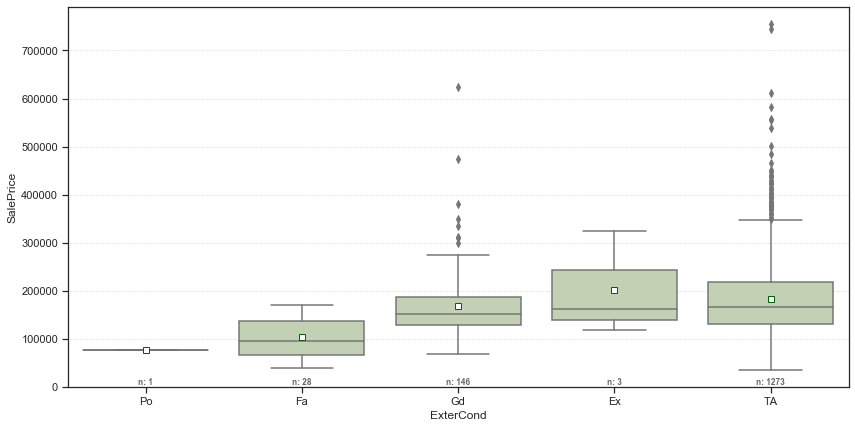

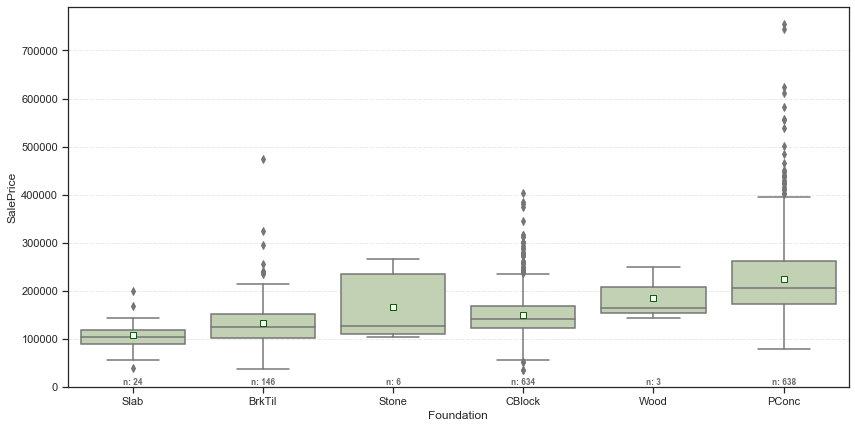

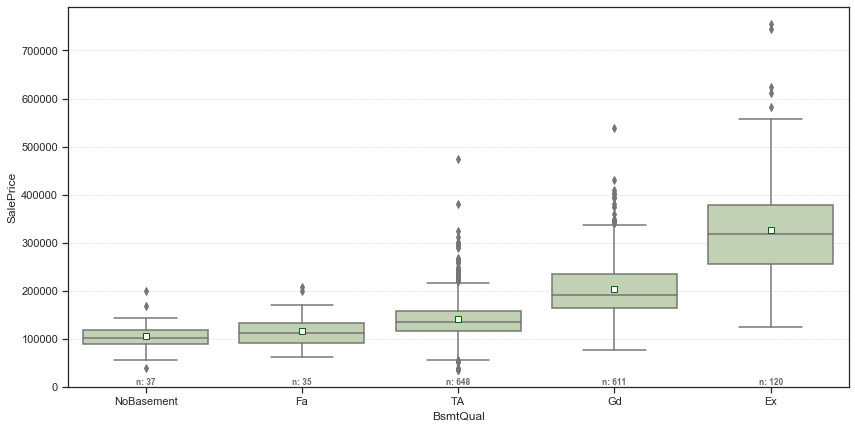

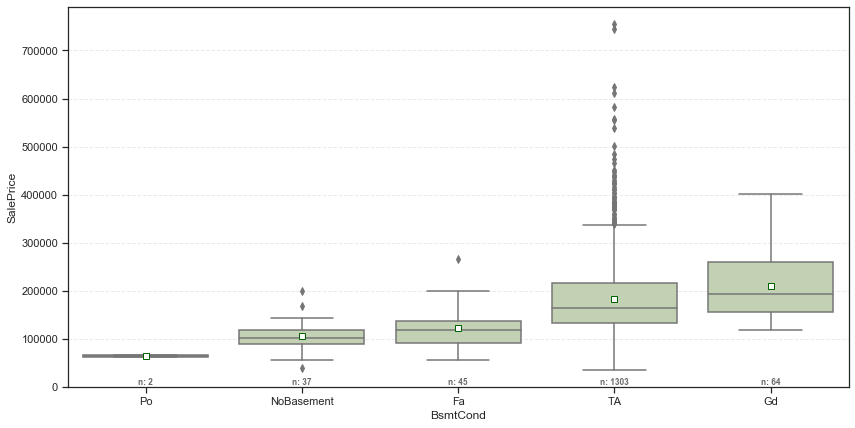

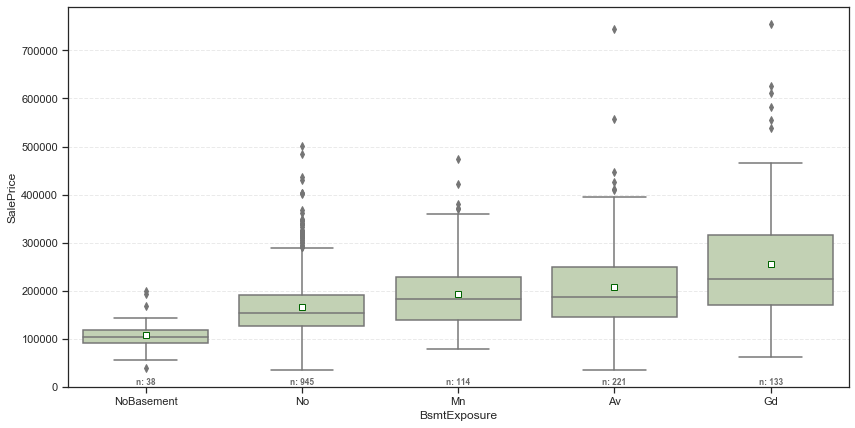

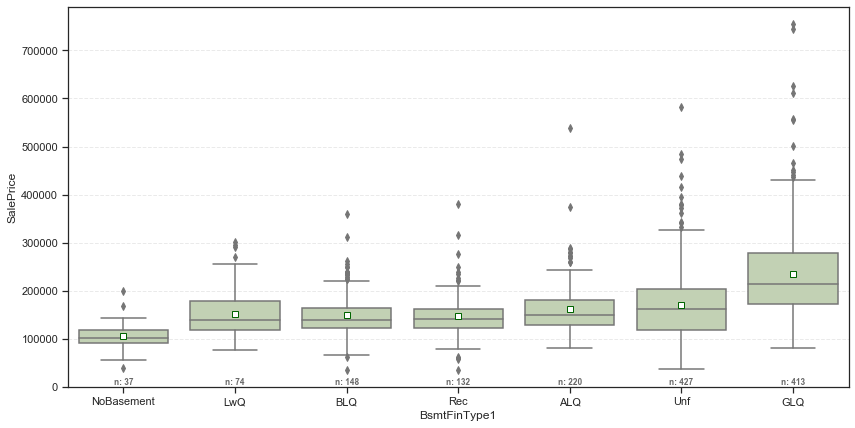

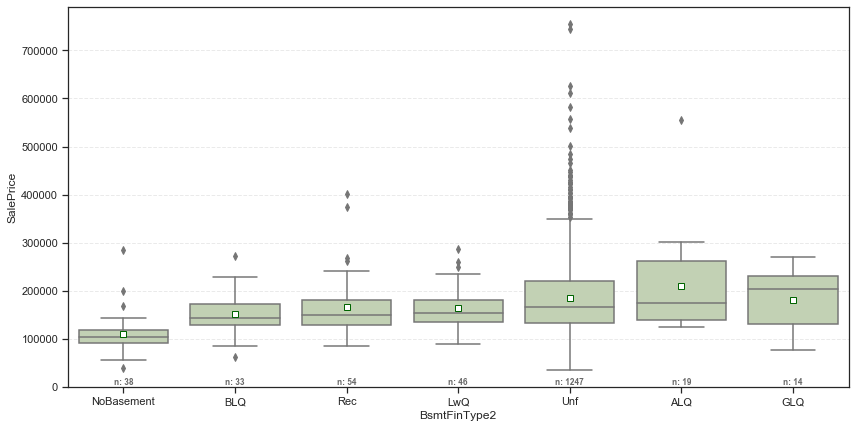

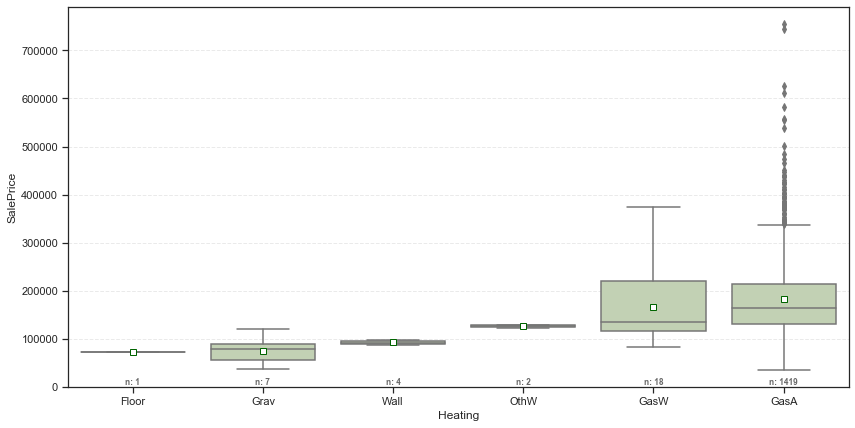

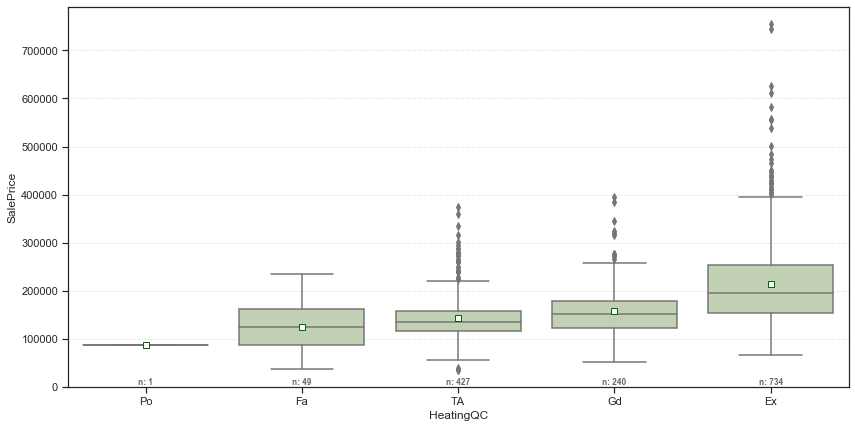

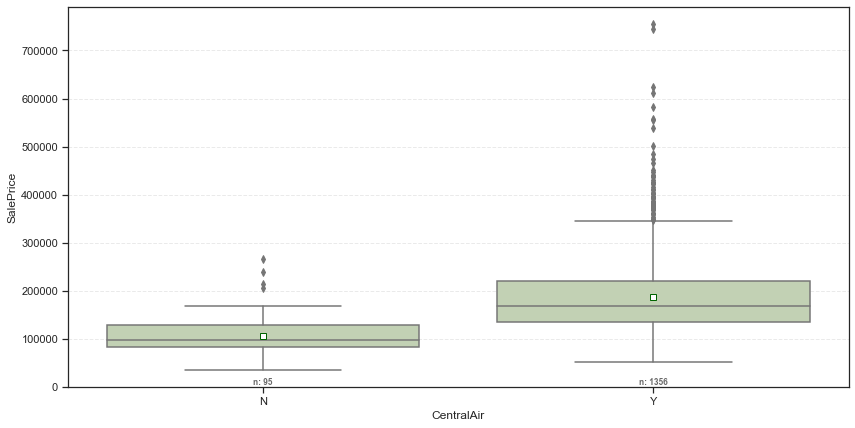

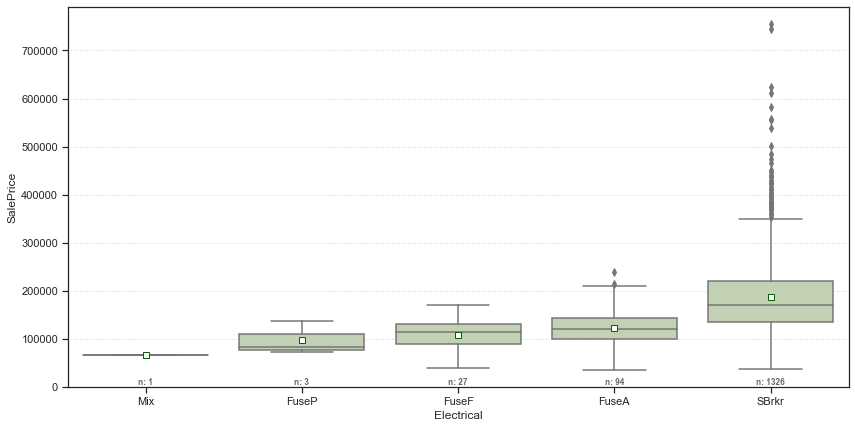

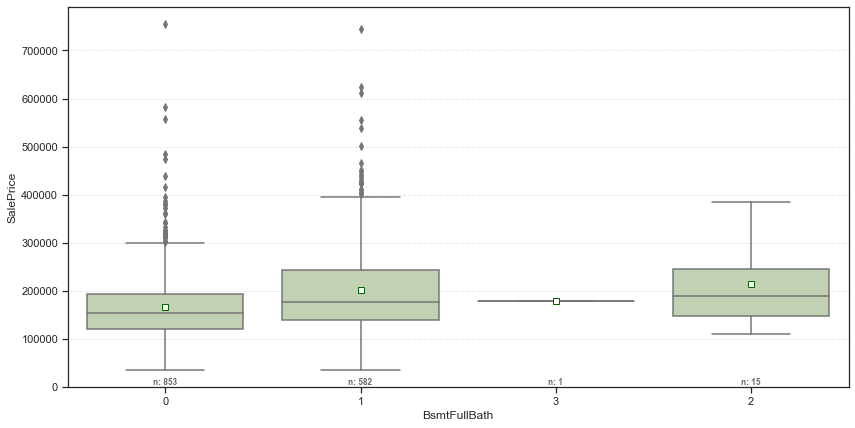

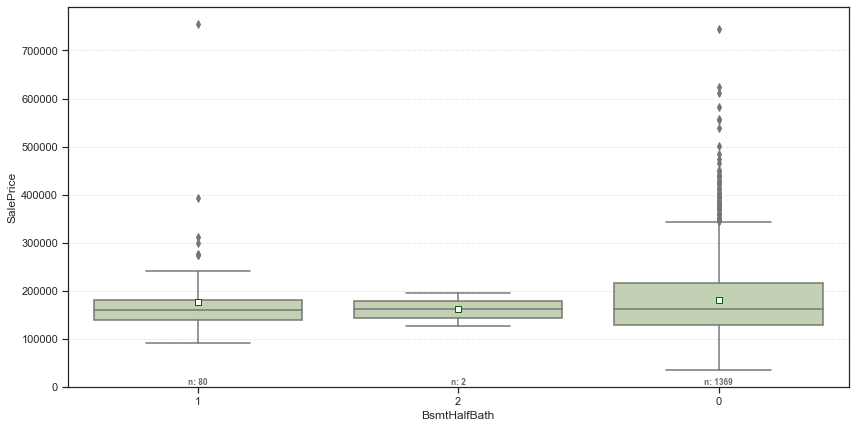

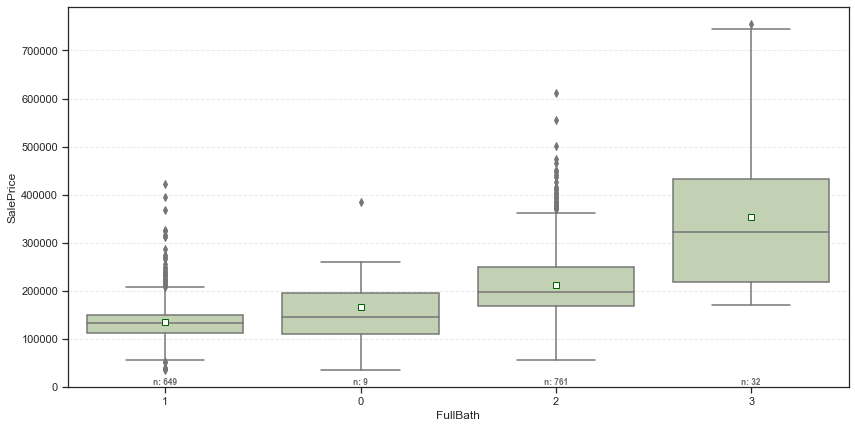

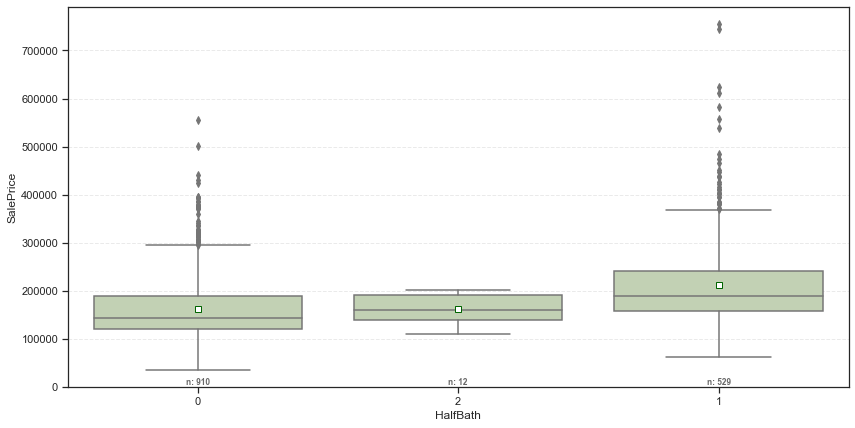

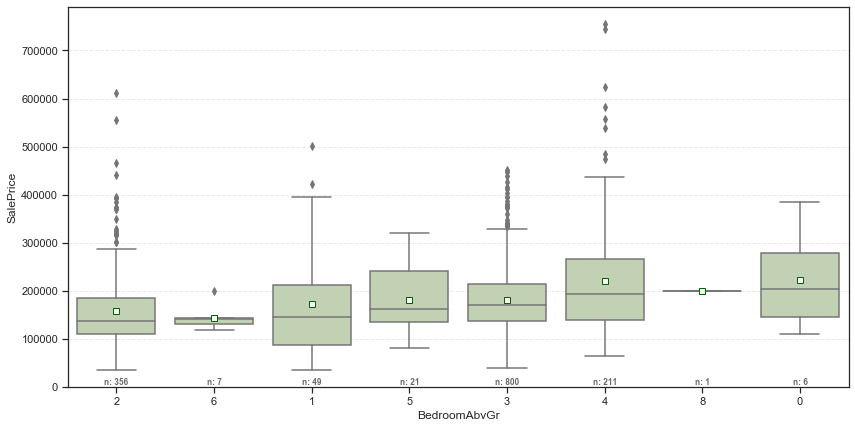

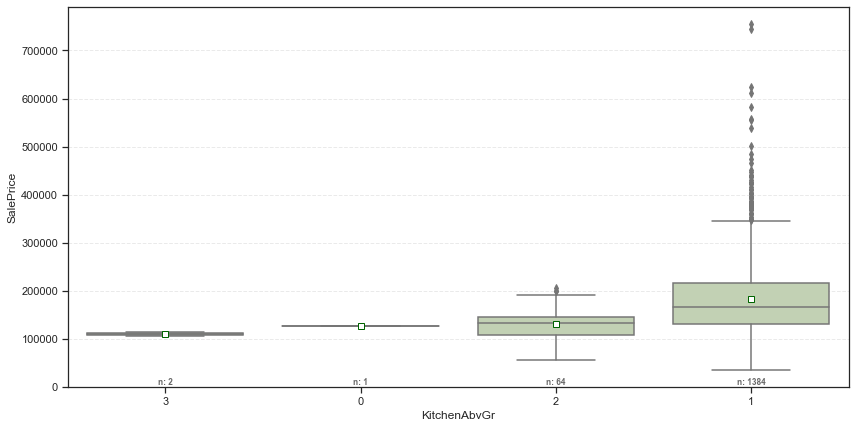

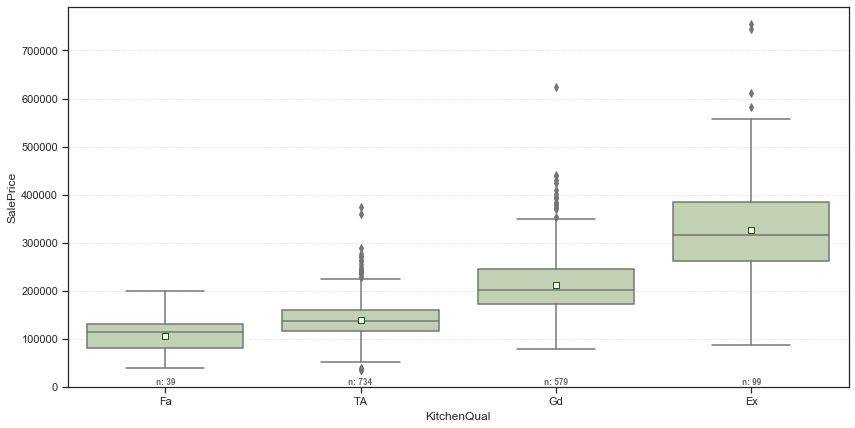

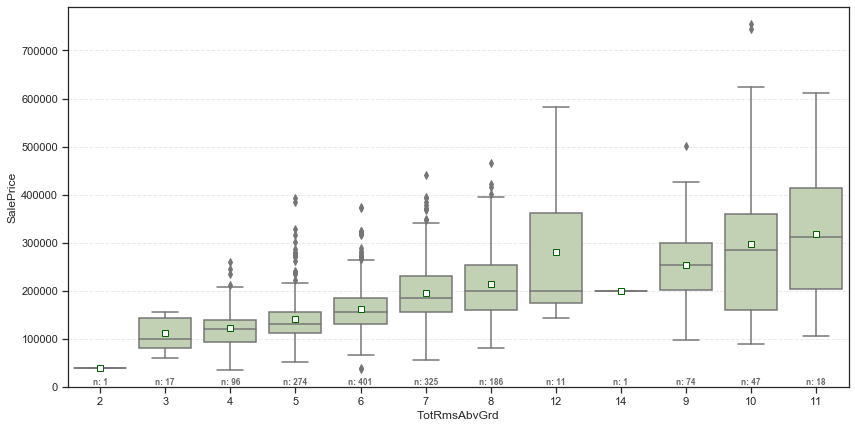

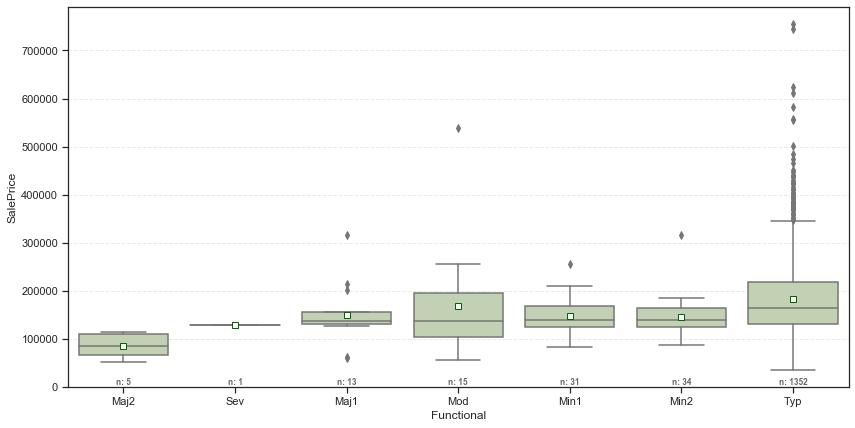

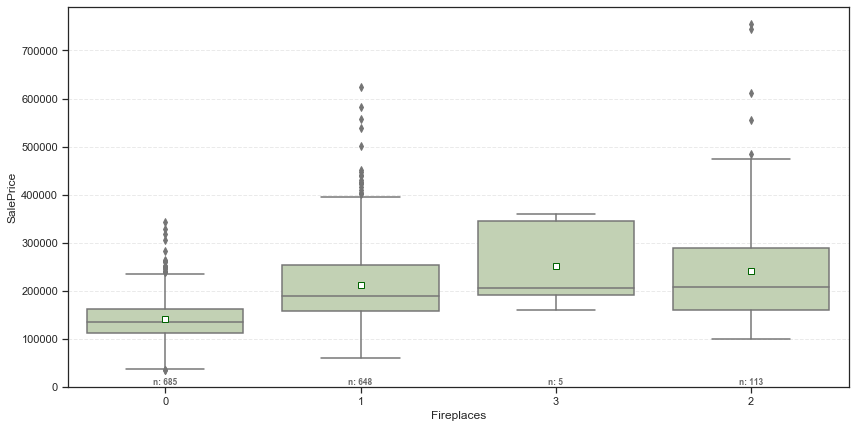

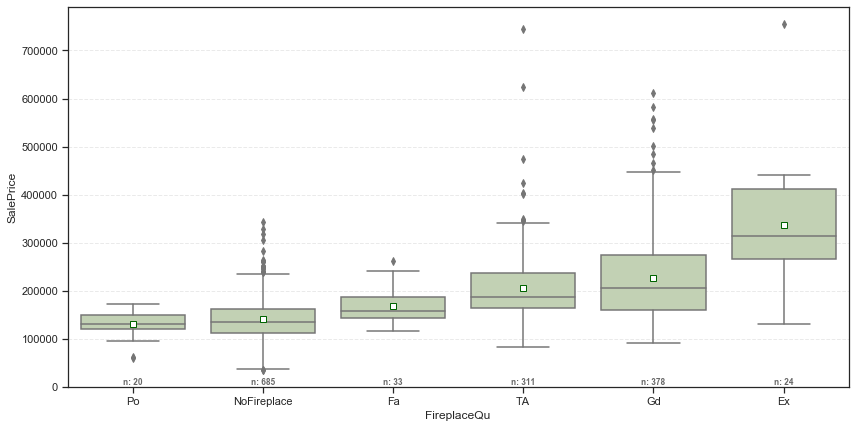

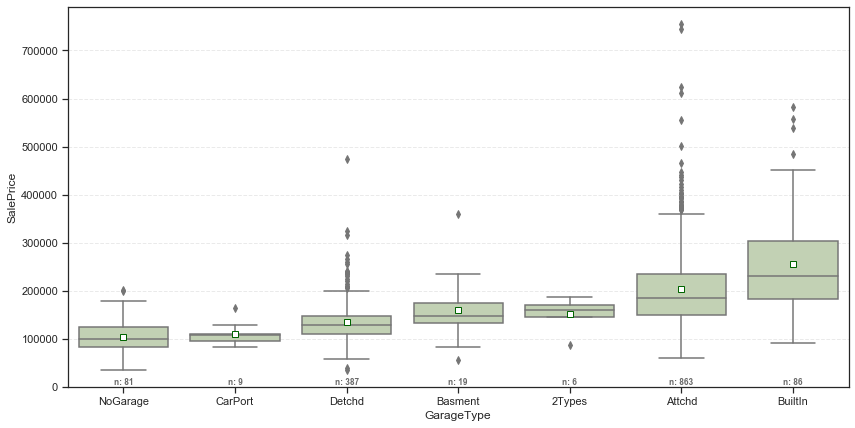

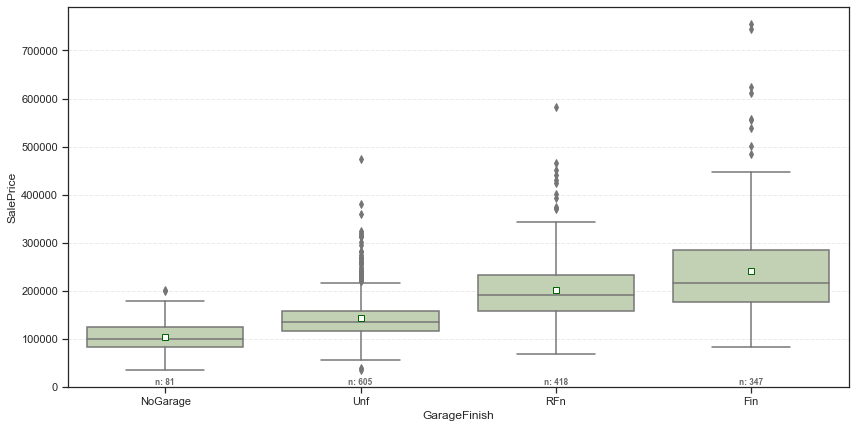

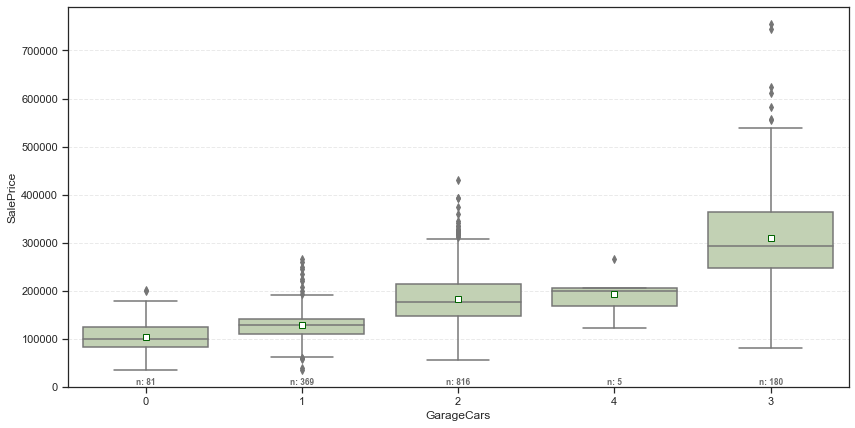

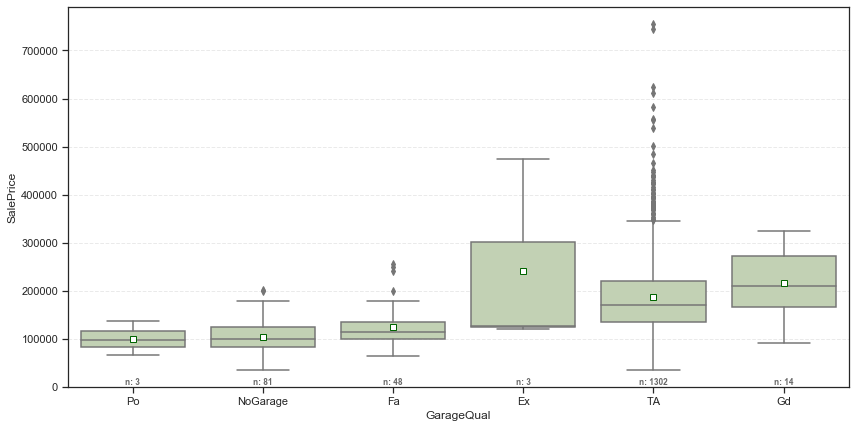

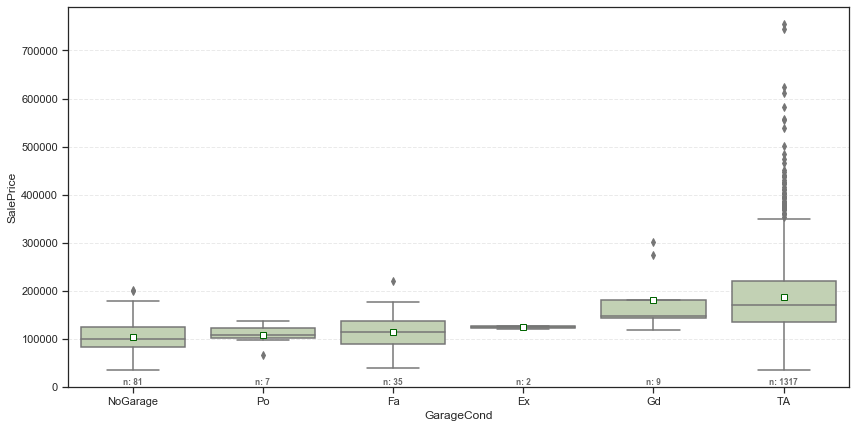

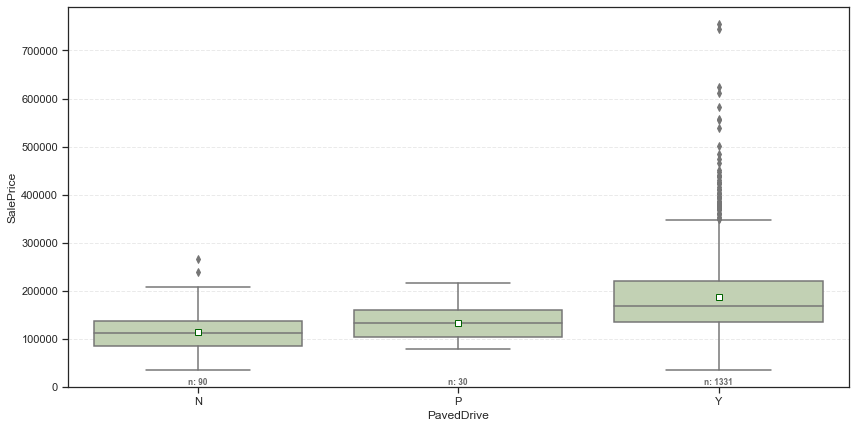

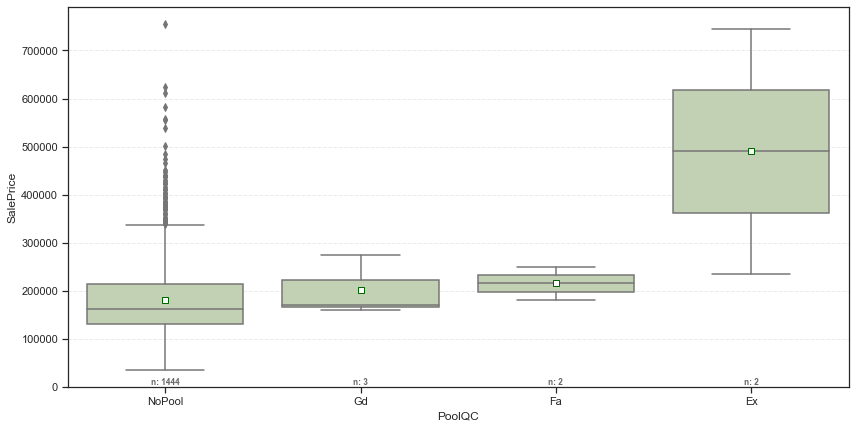

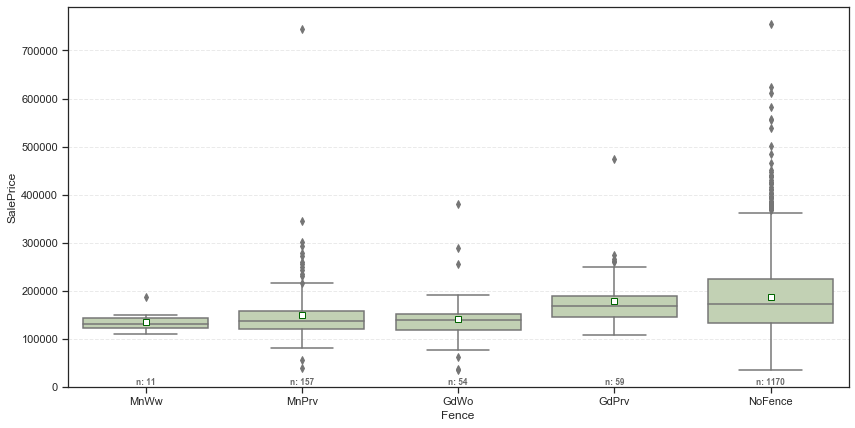

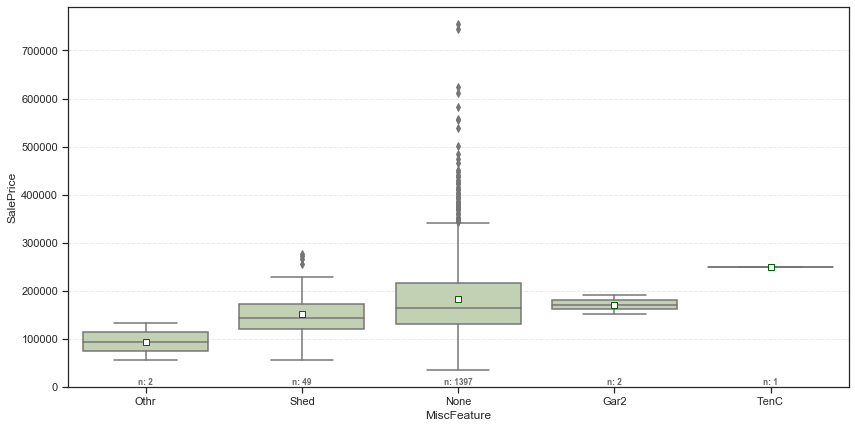

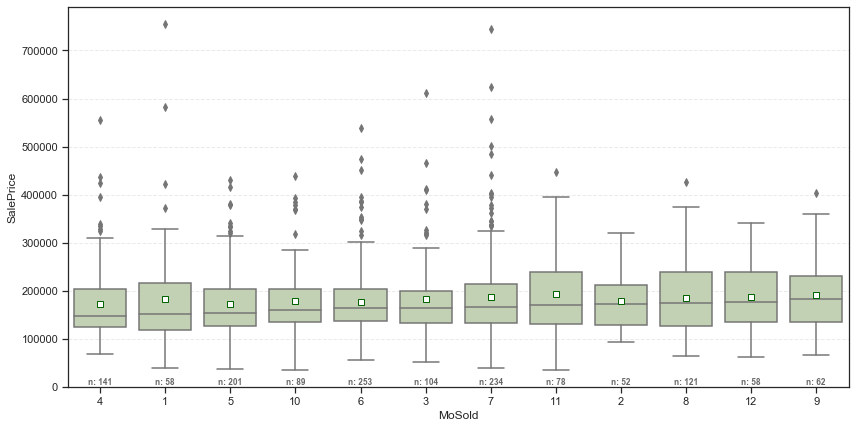

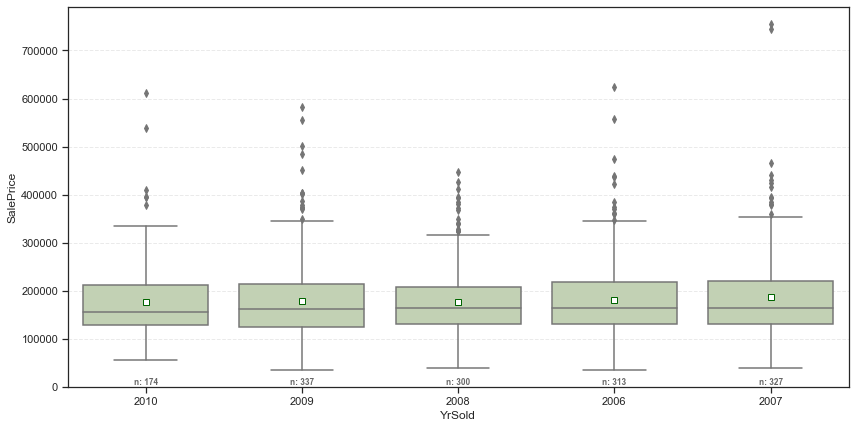

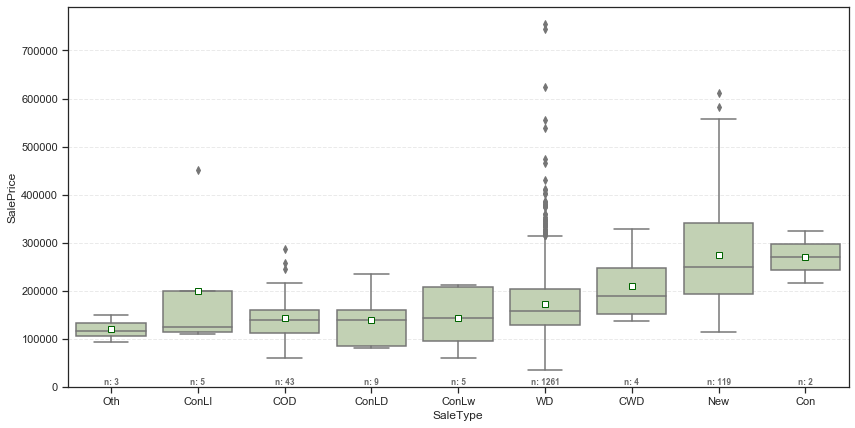

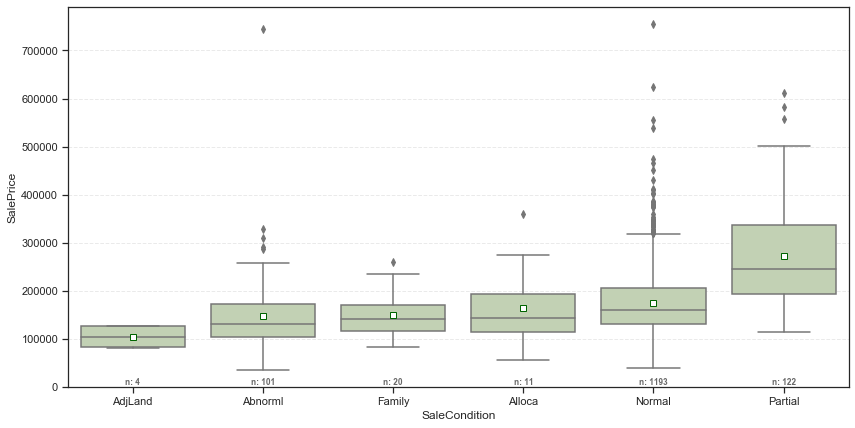

In [31]:
features = (
    #'Id',
 'MSSubClass',
 'MSZoning',
 #'LotFrontage',
 #'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 #'YearBuilt',
 #'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 #'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 #'BsmtFinSF1',
 'BsmtFinType2',
 #'BsmtFinSF2',
 #'BsmtUnfSF',
 #'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 #'1stFlrSF',
 #'2ndFlrSF',
 #'LowQualFinSF',
 #'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 #'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 #'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 #'WoodDeckSF',
 #'OpenPorchSF',
 #'EnclosedPorch',
 #'3SsnPorch',
 #'ScreenPorch',
 #'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 #'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition'
 )


boxplot(features)

# Scatter Plots (continuous variables)

In [ ]:
plt.figure(figsize = (14,7))
sns.set(style="ticks", color_codes=True)
sns.regplot(df_train[''], df_train["SalePrice"], color = [0.7622812227381776, 0.8406850963511671, 0.6846482959871109],
            line_kws={"color":"darkgreen","alpha":0.7,"lw":3})
plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "y")
plt.show()

In [32]:
def scatterplot (features):
    
    for elem in features:
   
        plt.figure(figsize = (14,7))
        sns.set(style="ticks", color_codes=True)
        sns.regplot(df_train[elem], df_train["SalePrice"],
                    color = [0.7622812227381776, 0.8406850963511671, 0.6846482959871109],
                    line_kws={"color":"darkgreen","alpha":0.7,"lw":3})
        plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "y")
        plt.show()
        

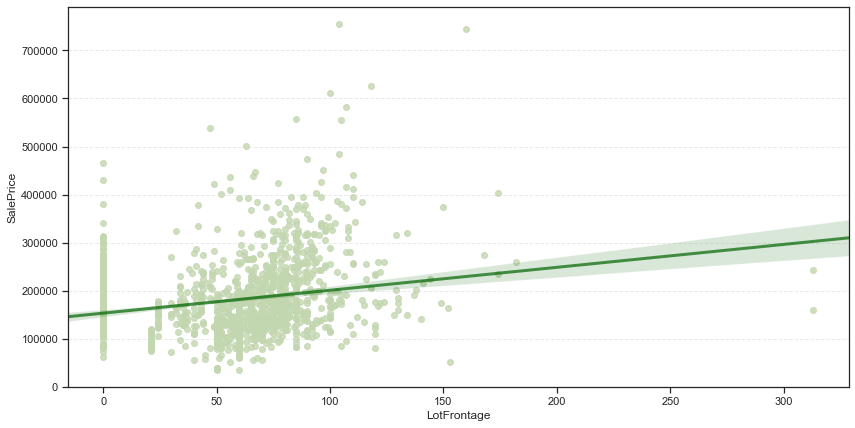

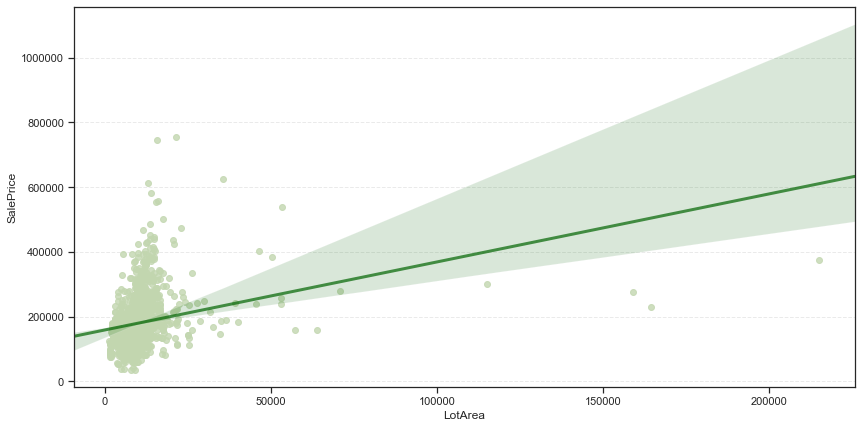

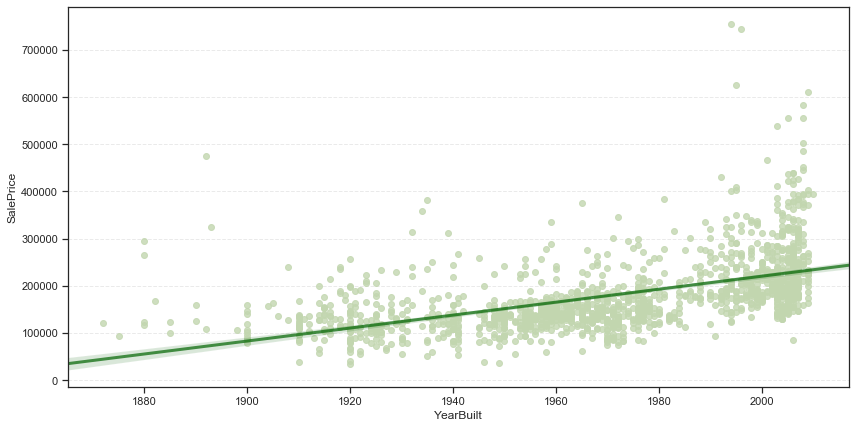

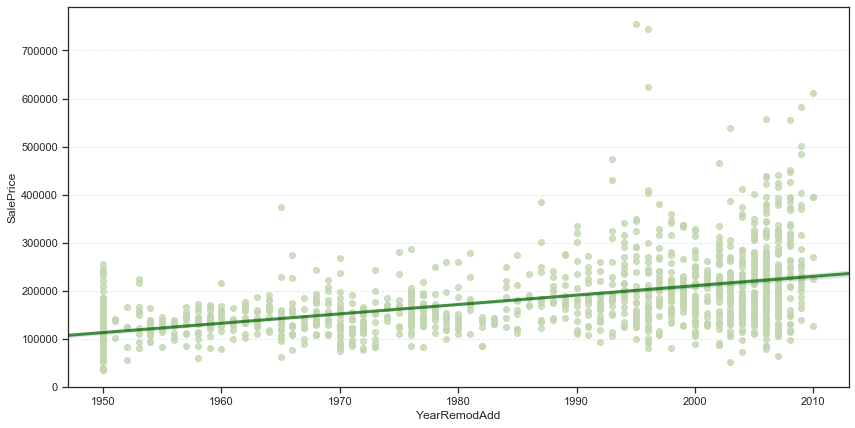

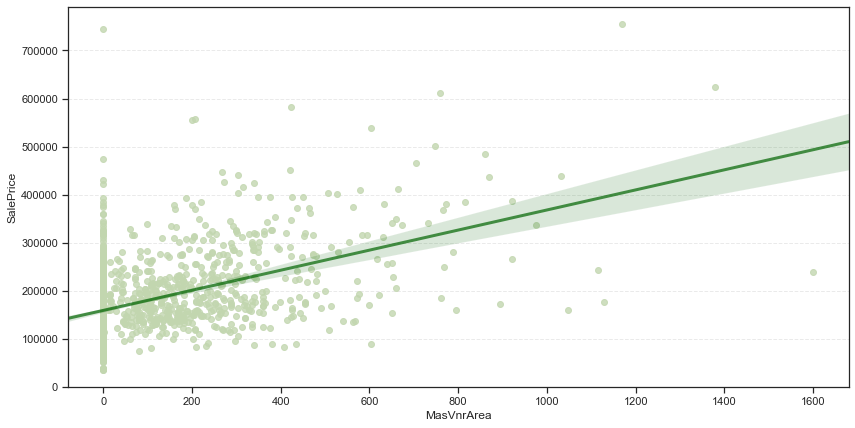

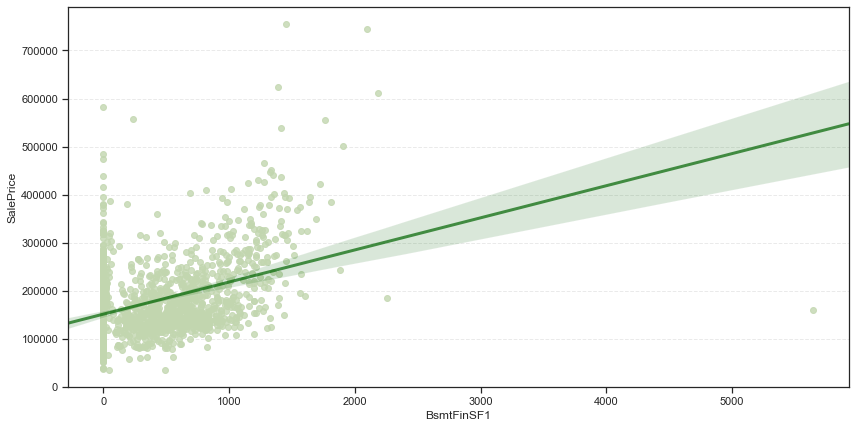

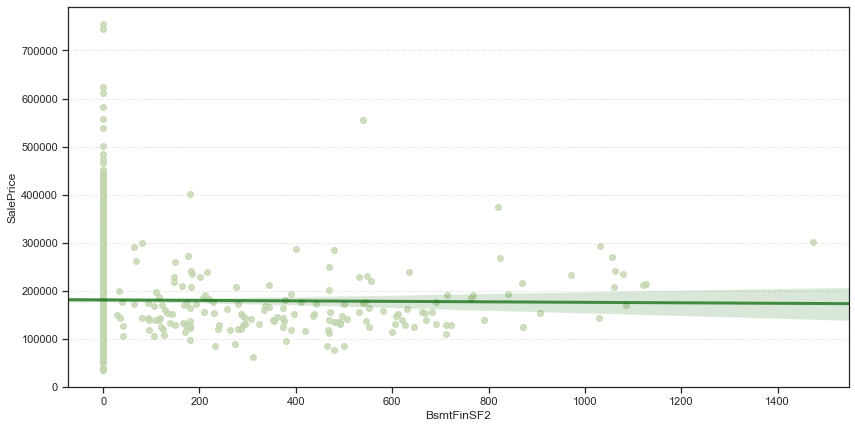

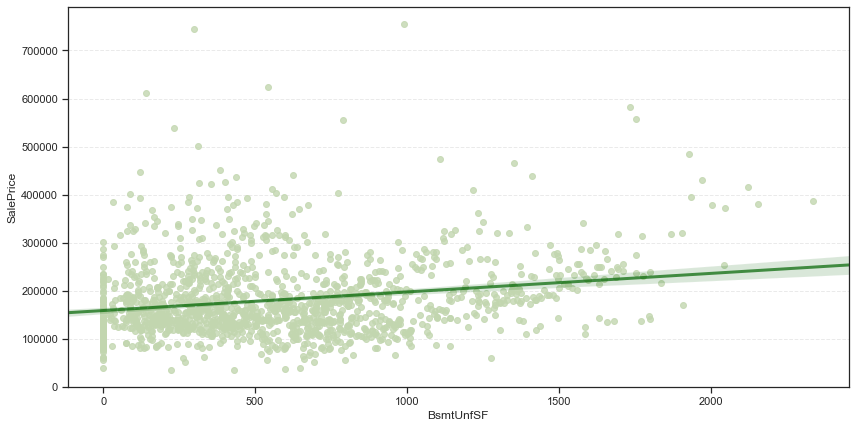

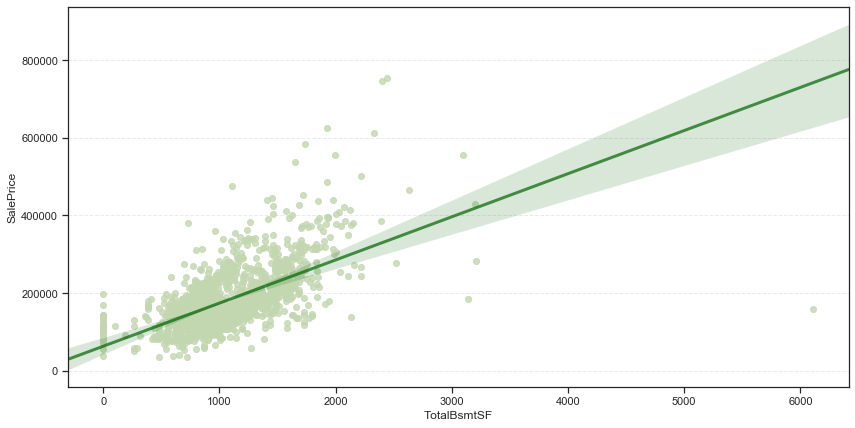

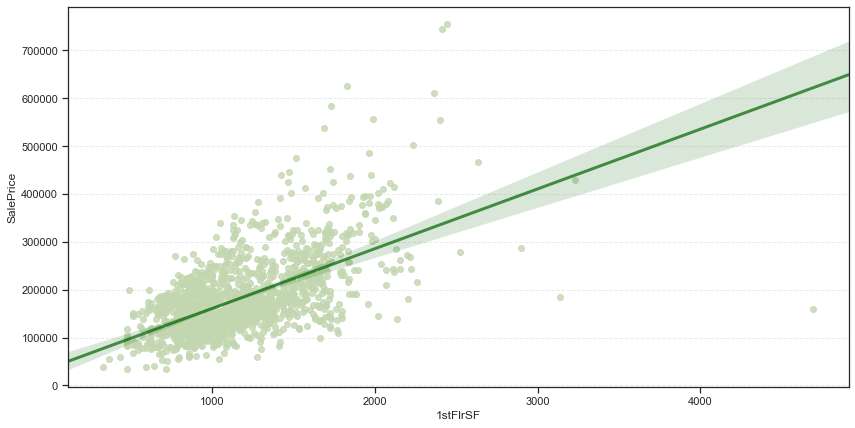

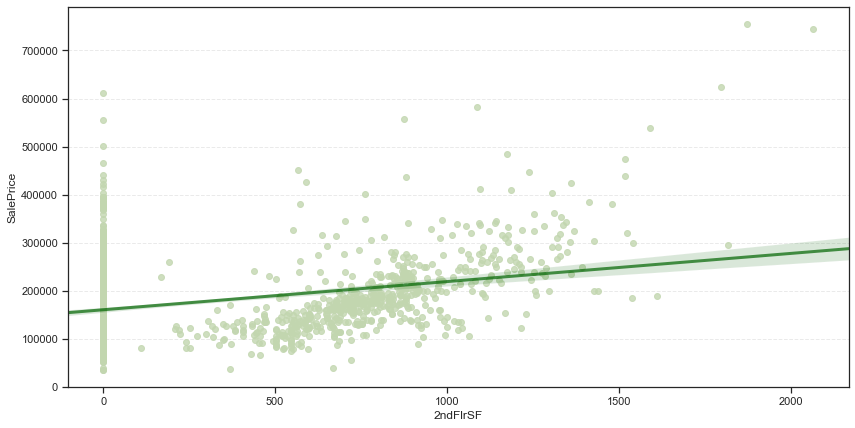

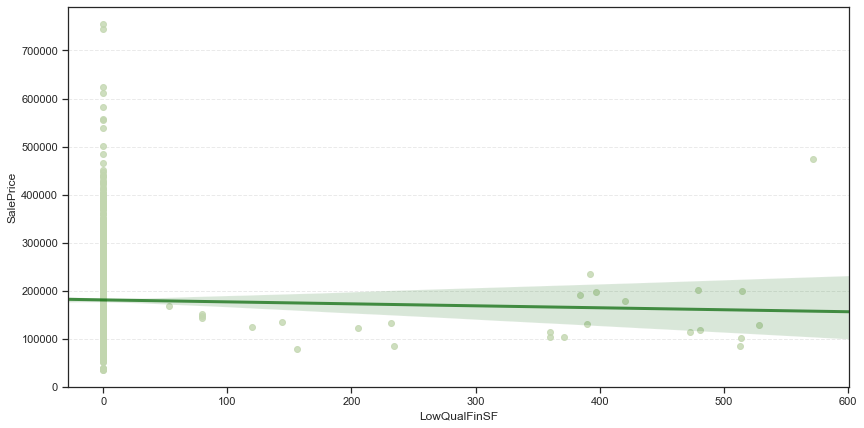

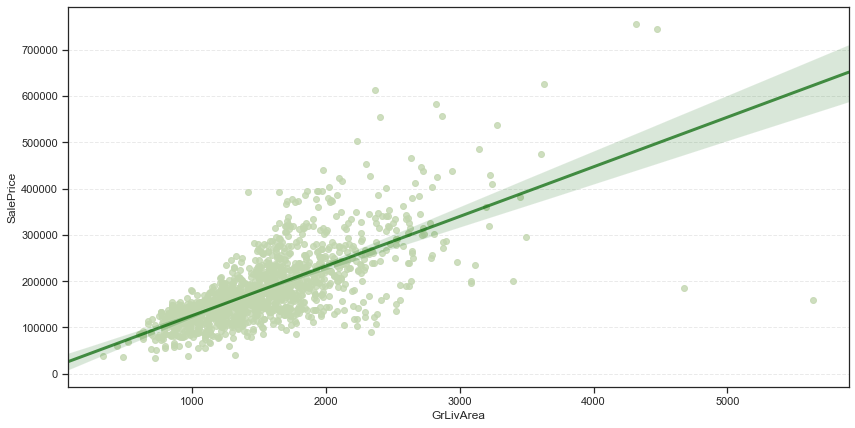

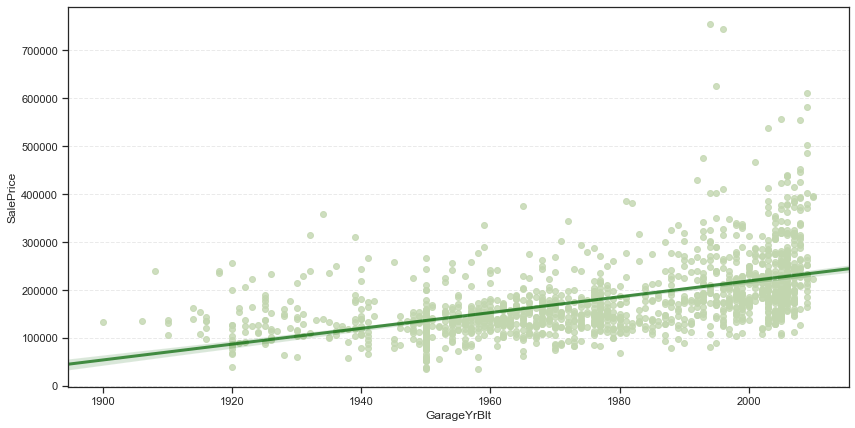

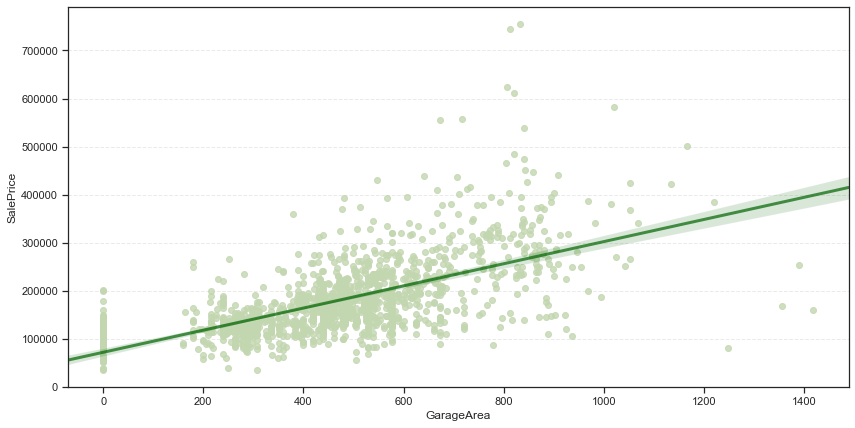

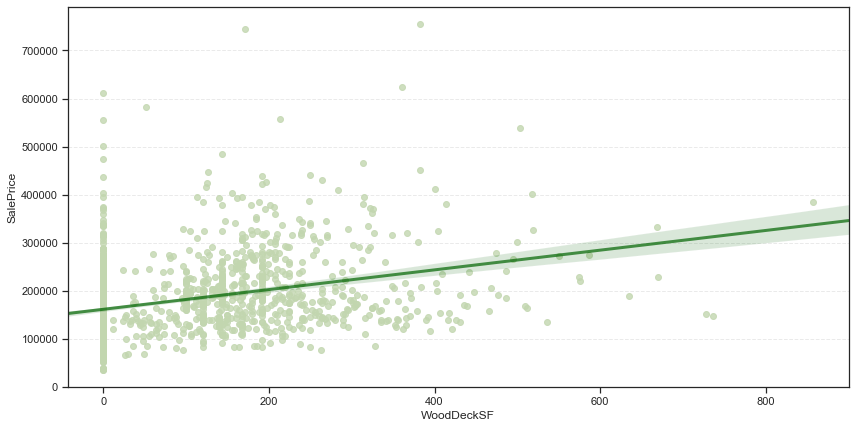

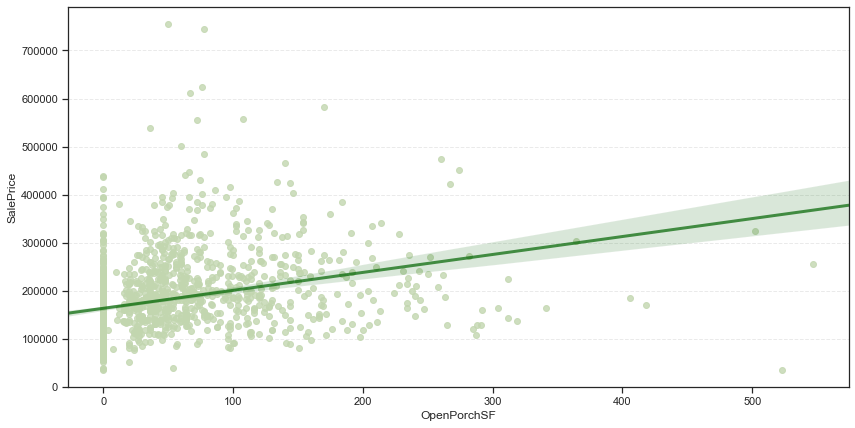

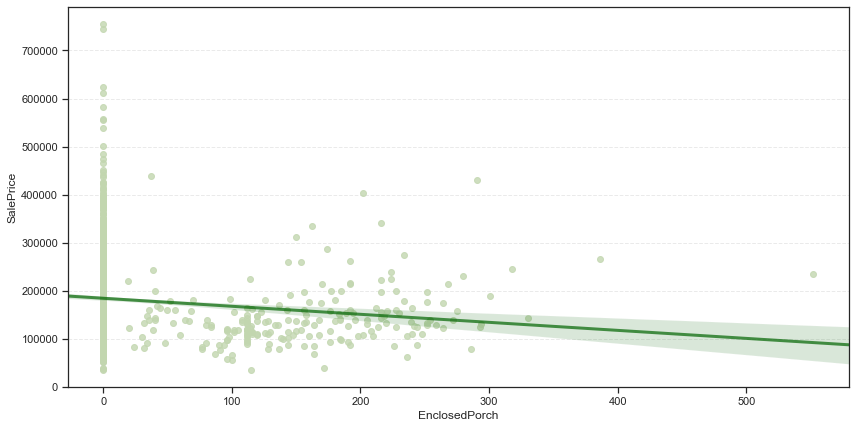

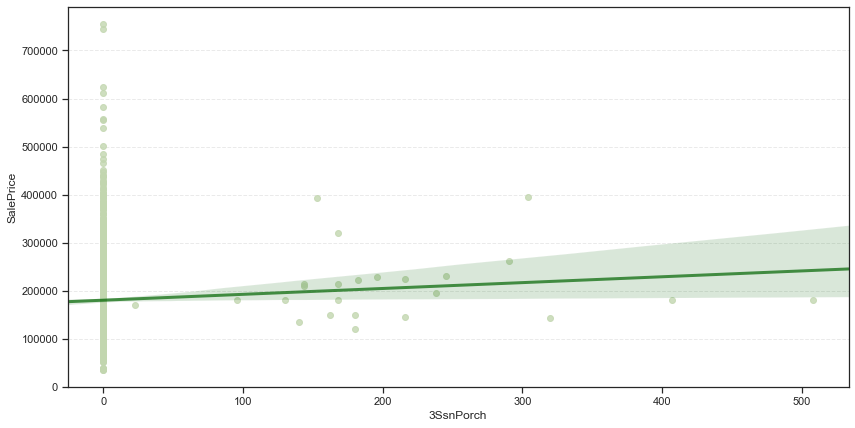

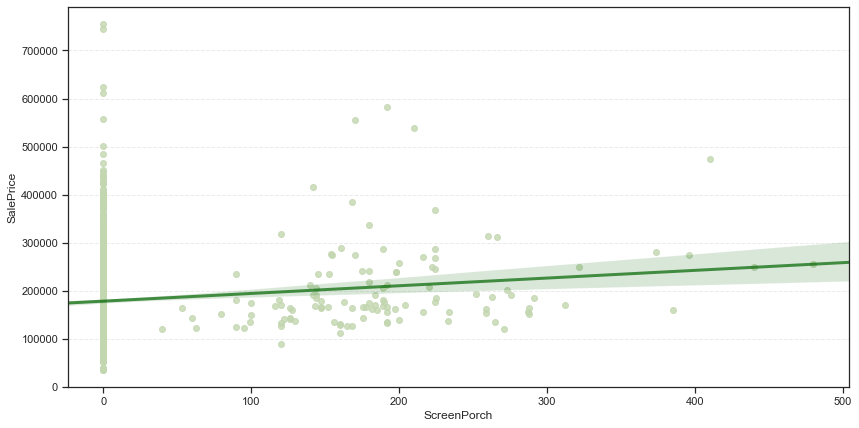

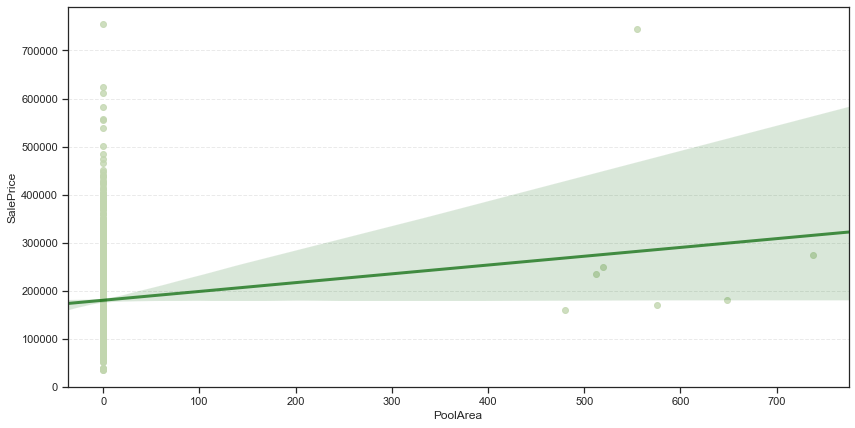

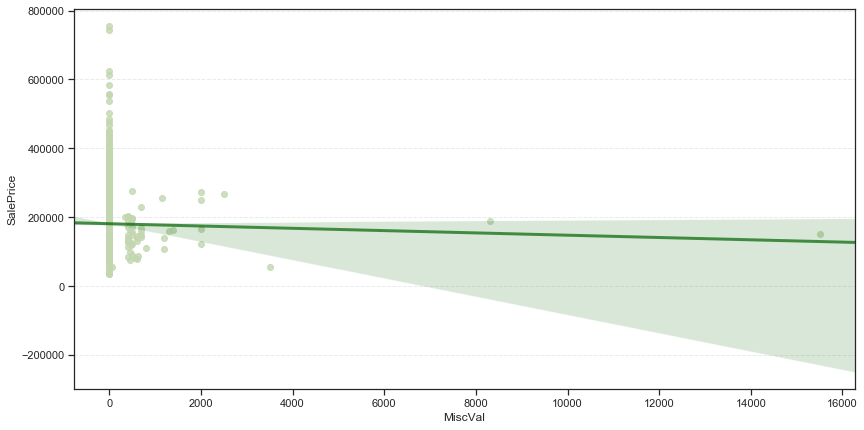

In [33]:
continuous_feature = (
#  'Id',
#  'MSSubClass',
#  'MSZoning',
'LotFrontage',
'LotArea',
#  'Street',
#  'Alley',
#  'LotShape',
#  'LandContour',
#  'Utilities',
#  'LotConfig',
#  'LandSlope',
#  'Neighborhood',
#  'Condition1',
#  'Condition2',
#  'BldgType',
#  'HouseStyle',
#  'OverallQual',
#  'OverallCond',
'YearBuilt',
'YearRemodAdd',
#  'RoofStyle',
#  'RoofMatl',
#  'Exterior1st',
#  'Exterior2nd',
#  'MasVnrType',
'MasVnrArea',
#  'ExterQual',
#  'ExterCond',
#  'Foundation',
#  'BsmtQual',
#  'BsmtCond',
#  'BsmtExposure',
#  'BsmtFinType1',
'BsmtFinSF1',
#  'BsmtFinType2',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
#  'Heating',
#  'HeatingQC',
#  'CentralAir',
#  'Electrical',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
#  'BsmtFullBath',
#  'BsmtHalfBath',
#  'FullBath',
#  'HalfBath',
#  'BedroomAbvGr',
#  'KitchenAbvGr',
#  'KitchenQual',
#  'TotRmsAbvGrd',
#  'Functional',
#  'Fireplaces',
#  'FireplaceQu',
#  'GarageType',
'GarageYrBlt',
#  'GarageFinish',
#  'GarageCars',
'GarageArea',
#  'GarageQual',
#  'GarageCond',
#  'PavedDrive',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
#  'PoolQC',
#  'Fence',
#  'MiscFeature',
'MiscVal',
#  'MoSold',
#  'YrSold',
#  'SaleType',
#  'SaleCondition'
 )


scatterplot(continuous_feature)

# Dummy Variables

In [34]:
def dummy2(cat_names, feature):

    for elem in feature:
        x = df_train[elem].unique()
        for cat in x[0:len(x)-1]:
            df_train[elem + '_' + cat_names[feature.index(elem)][cat]] = df_train[elem] == cat

In [35]:
feature = ('OverallQual', 'Street')

cat_names = [{1:'Very_Poor', 2:'Poor', 3:'Fair', 4:'Below_Average', 5:'Average',
             6:'Above_Average', 7:'Good', 8:'Very_Good', 9:'Excellent', 10:'Very_excellent'}, {'Glvr': 'Glvr', 'Pave': 'Pave'}]

dummy2(cat_names, feature)

In [36]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual_Good,OverallQual_Above_Average,OverallQual_Very_Good,OverallQual_Average,OverallQual_Excellent,OverallQual_Below_Average,OverallQual_Very_excellent,OverallQual_Fair,OverallQual_Very_Poor,Street_Pave
0,1,60,RL,65.0,8450,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,True,False,False,False,False,False,False,False,False,True
1,2,20,RL,80.0,9600,Pave,NoAccess,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,False,True,False,False,False,False,False,False,False,True
2,3,60,RL,68.0,11250,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,True,False,False,False,False,False,False,False,False,True
3,4,70,RL,60.0,9550,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,True,False,False,False,False,False,False,False,False,True
4,5,60,RL,84.0,14260,Pave,NoAccess,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,False,False,True,False,False,False,False,False,False,True


### Overall Quality (OverallQual)

      10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [39]:
# #Color palett
# sns.cubehelix_palette(15, start=.5, rot=-.75)[1]

# Check for Normality

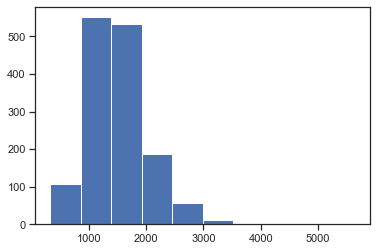

In [52]:
plt.hist(df_train["GrLivArea"])
pylab.show()

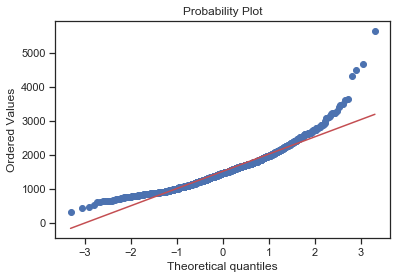

In [50]:
stats.probplot(df_train["GrLivArea"], dist="norm", plot=pylab, fit = False)
pylab.show()


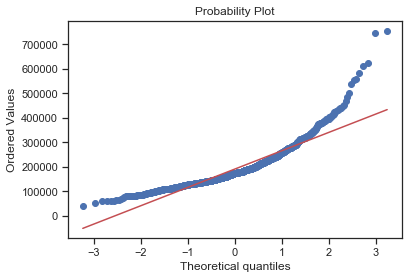

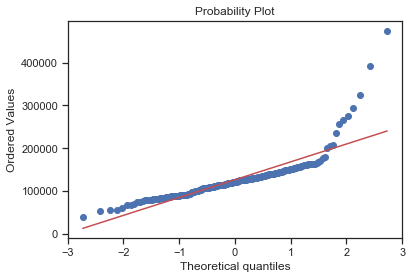

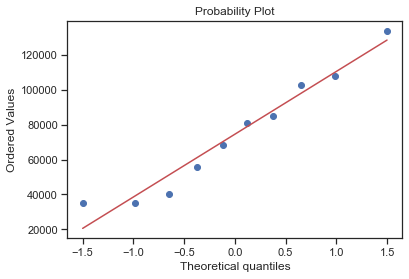

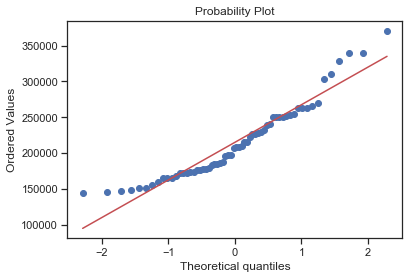

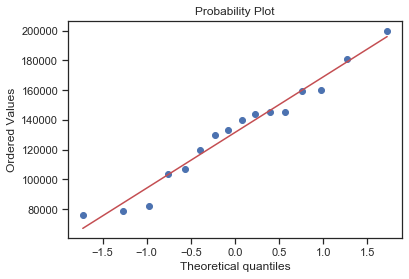

In [40]:
def probplot (feature):

    unique = df_train[feature].unique()
    
    for name in unique:
        stats.probplot(df_train['SalePrice'][df_train[feature] == name], dist="norm", plot=pylab, fit = False)
        pylab.show()
    
probplot("MSZoning")

In [41]:
def hist_faceting (features):
    
    for elem in features:

        unique = df_train[elem].unique()

        temp = 0
        i = 0
        y = 0
        z = 0
        color = sns.cubehelix_palette(20, start=.5, rot=-.75)

        f, axes = plt.subplots((round(len(unique)/2) + (0 if len(unique)%2 == 0 else 1)), 2,
                               figsize=(8, len(unique)*2), sharex = False)
        plt.suptitle(elem, y = 1.0, fontsize=16)

        for name in unique:
            ax = sns.distplot( df_train['SalePrice'][df_train[elem] == name], color = color[z], ax = axes[i, y])
            ax.set_title(name)
            ax.set_xticks([])
            ax.set_xlabel("")
            ax.set_yticks([])
            temp = temp + 0.49999999
            i = round(temp)
            y = (0 if y == 1 else 1)
            z = z + 1

    

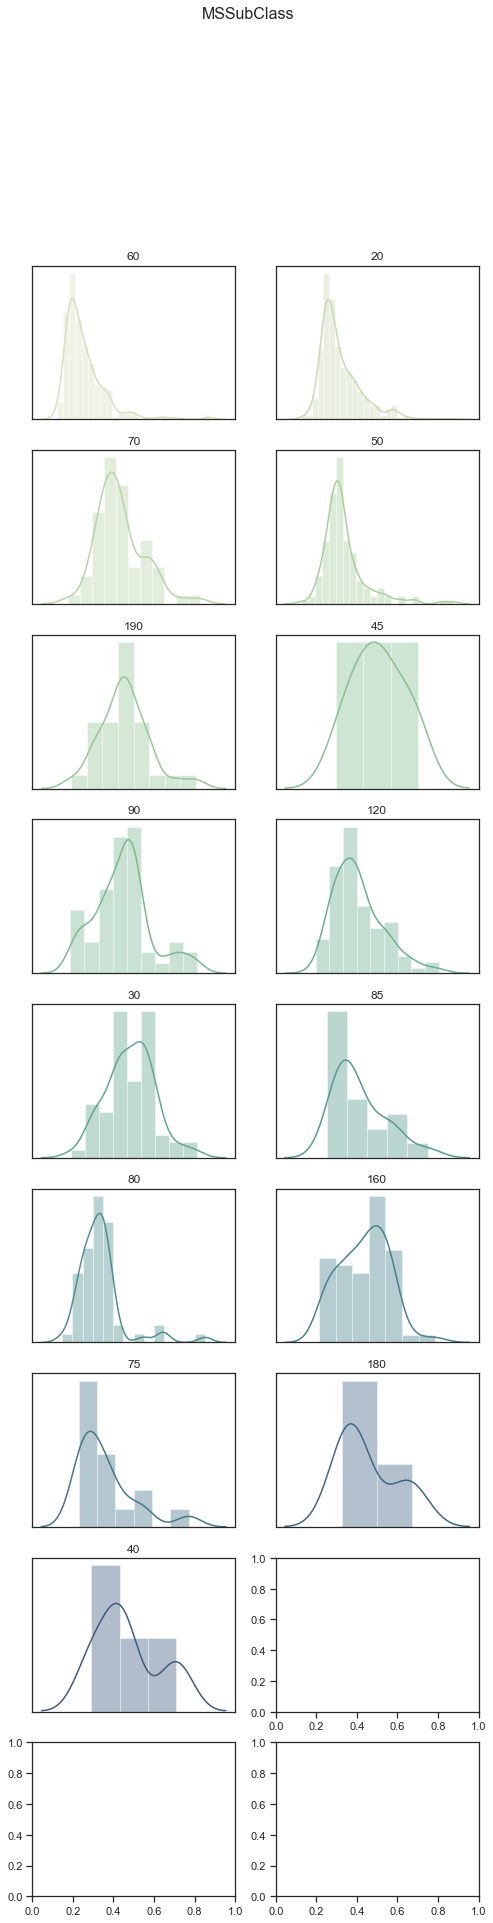

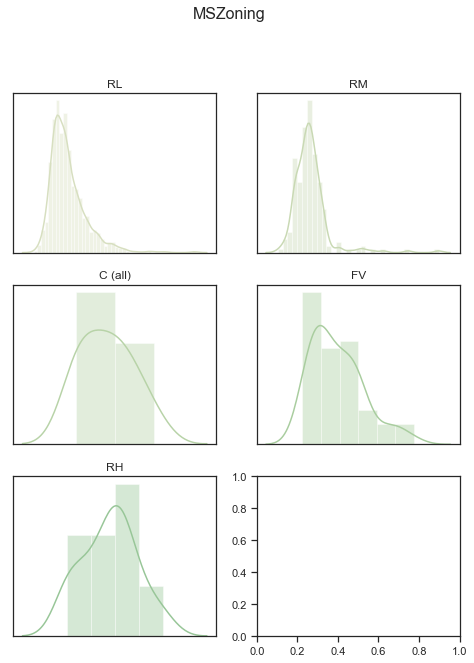

In [42]:
features = (
    #'Id',
 'MSSubClass',
 'MSZoning')

hist_faceting(features)

#  Testing for Multicollinearity

In [48]:
df1 = df_train[list(continuous_feature)]
df1.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,0


In [46]:
continuous_feature_list = list(continuous_feature)
df1 = df_train[continuous_feature_list]

scores = {}
ols = linear_model.LinearRegression()

for feature_name in continuous_feature_list:
                df2     = df1.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols.fit(df2, feature)
                scores[feature_name] = ols.score(df2, feature) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

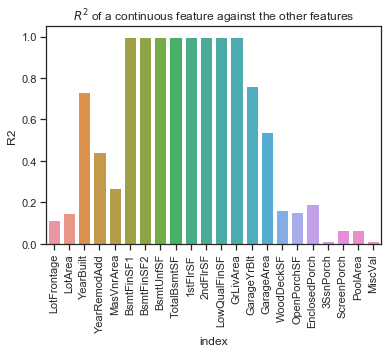

In [47]:
sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')
plt.xticks(rotation=90)